In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
# loading training set
train_label_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/raw/train.csv', sep='\t')
print(train_label_df.T)
# validation set
validate_label_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/raw/dev.csv', sep='\t')
print(validate_label_df.T)
test_label_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/raw/test.csv', sep='\t')
print(test_label_df.T)

         0     1     2     3     4     ...   8153   8154   8155   8156   8157
user_id  2774  2775  2776  2777  2778  ...  10927  10928  10929  10930  10931
label       0     0     1     0     1  ...      1      1      0      1      0

[2 rows x 8158 columns]
          0      1      2      3      4     ...   2653   2654   2655   2656   2657
user_id  10932  10933  10934  10935  10936  ...  13585  13586  13587  13588  13589
label        0      1      0      1      0  ...      0      0      0      1      0

[2 rows x 2658 columns]
         0     1     2     3     4     5     ...  2767  2768  2769  2770  2771  2772
user_id     1     2     3     4     5     6  ...  2768  2769  2770  2771  2772  2773

[1 rows x 2773 columns]


In [4]:
# the sequential log data
seq_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/raw/level_seq.csv', sep='\t')
print(seq_df)
# the meta data
meta_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/raw/level_meta.csv', sep='\t')
print(meta_df)

         user_id  level_id  f_success  ...  f_reststep  f_help                 time
0          10932         1          1  ...    0.500000       0  2020-02-01 00:05:51
1          10932         2          1  ...    0.703704       0  2020-02-01 00:08:01
2          10932         3          1  ...    0.560000       0  2020-02-01 00:09:50
3          10932         4          1  ...    0.700000       0  2020-02-01 00:11:16
4          10932         5          1  ...    0.666667       0  2020-02-01 00:13:12
...          ...       ...        ...  ...         ...     ...                  ...
2194346    10931        40          1  ...    0.250000       1  2020-02-03 16:26:37
2194347    10931        41          1  ...    0.277778       0  2020-02-03 16:28:06
2194348    10931        42          0  ...    0.000000       1  2020-02-03 16:30:17
2194349    10931        42          0  ...    0.000000       0  2020-02-03 16:33:40
2194350    10931        42          1  ...    0.181818       0  2020-02-03 1

In [5]:
user_ids = sorted(list(set(seq_df['user_id'])))
level_ids = list(meta_df['level_id'])

### Feature Extraction

#### Extract Features According To Days

In [ ]:
from datetime import datetime
datetimeFormat = "%Y-%m-%d %H:%M:%S"

seq_df['time'] = seq_df['time'].apply(lambda x: datetime.strptime(x, datetimeFormat))
seq_df['day'] = seq_df['time'].apply(lambda x: x.day)

In [ ]:
# Day features
feature_list = ['last_day','rounds','num_of_days','highest_level_attained',
                'highest_level_passed','total_duration','avg_duration',
                'succ_duration_ratio','mean_reststep','succ_mean_reststep','total_help',
                'succ_help_ratio','passrate',
                '1 num_of_rounds','1 tot_duraiton','1 num_of_helps','1 sep_time','1 num_of_success',
                '1 succ_duration_ratio','1 lastest_level','1 latest_attempts','1 maximum attempts','1 passrate',
                '1 num_of_levels','1 was_active_prev_day',
                '2 num_of_rounds','2 tot_duraiton','2 num_of_helps','2 sep_time','2 num_of_success',
                '2 succ_duration_ratio','2 lastest_level','2 latest_attempts','2 maximum attempts','2 passrate',
                '2 num_of_levels','2 was_active_prev_day',
                '3 num_of_rounds','3 tot_duraiton','3 num_of_helps','3 sep_time','3 num_of_success',
                '3 succ_duration_ratio','3 lastest_level','3 latest_attempts','3 maximum attempts','3 passrate',
                '3 num_of_levels','3 was_active_prev_day',
                '4 num_of_rounds','4 tot_duraiton','4 num_of_helps','4 sep_time','4 num_of_success',
                '4 succ_duration_ratio','4 lastest_level','4 latest_attempts','4 maximum attempts','4 passrate',
                '4 num_of_levels','4 was_active_prev_day']

df_byDay = pd.DataFrame(0, index=user_ids, columns=feature_list)

In [ ]:
def extract_features_byDay(seq_df, df):
  for id in user_ids:
    # obtain individual user dataframe from seq_df
    id_df = seq_df.loc[seq_df['user_id'] == id]
    success_df = id_df[id_df['f_success'] == 1]
    # extract the general features
    days = np.array(id_df['day'])
    df.loc[id,'last_day'] = days.max()
    df.loc[id,'rounds'] = id_df.shape[0]
    days = set(days)
    df.loc[id,'num_of_days'] = len(days)
    df.loc[id,'highest_level_attained'] = id_df['level_id'].max()
    if not success_df.empty: df.loc[id,'highest_level_passed'] = success_df['level_id'].max()
    df.loc[id,'total_duration'] = id_df['f_duration'].sum()
    df.loc[id,'avg_duration'] = (id_df['f_duration'].sum())/(id_df.shape[0])
    if not success_df.empty: df.loc[id,'succ_duration_ratio'] = success_df['f_duration'].sum()/id_df['f_duration'].sum()
    df.loc[id,'mean_reststep'] = id_df['f_reststep'].mean()
    if not success_df.empty: df.loc[id,'succ_mean_reststep'] = success_df['f_reststep'].mean()
    df.loc[id,'total_help'] = id_df['f_help'].sum()
    if not success_df.empty and id_df['f_help'].sum(): df.loc[id, 'succ_help_ratio'] = success_df['f_help'].sum()/id_df['f_help'].sum()
    df.loc[id,'passrate'] = id_df['f_success'].sum()/id_df.shape[0]
    
    # compute day-specific features
    for day in days:
      day_df = id_df.loc[id_df['day'] == day]
      # compute number of rounds on that day
      rounds = day_df['time'].shape[0]
      df.loc[id,str(day)+' num_of_rounds'] = rounds
      # compute total duration on that day
      duration = day_df['f_duration'].sum()
      df.loc[id,str(day)+' tot_duraiton'] = duration
      # compute total helps called on that day
      helps = day_df['f_help'].sum()
      df.loc[id,str(day)+' num_of_helps']=helps 
      # separation time between the first the last round on that day
      separation_time=day_df['time'].max()-day_df['time'].min()
      df.loc[id,str(day)+' sep_time'] = separation_time.seconds
      # count the number of successful rounds on that day
      num_of_success = day_df['f_success'].sum()
      df.loc[id,str(day)+' num_of_success'] = num_of_success
      # success duration ratio
      t_df = day_df.loc[day_df['f_success'] == 1]['f_duration']
      df.loc[id,str(day)+' succ_duration_ratio'] = t_df.sum()/duration
      # compute the latest level reached on that day
      latest_level = day_df['level_id'].max()
      df.loc[id,str(day)+' lastest_level'] = latest_level
      # compute number rounds played on the latest level
      latest_attempts = day_df.loc[day_df['level_id'] == latest_level].shape[0]
      df.loc[id,str(day)+' latest_attempts'] = latest_attempts
      
      levels = set(day_df['level_id'])
      attempts_per_lvl = []
      for lvl in levels:
        lvl_df = day_df.loc[day_df['level_id'] == lvl]
        attempts_per_lvl.append(lvl_df.shape[0]-lvl_df['f_success'].sum())
        passrate = lvl_df['f_success'].sum()/lvl_df.shape[0]
      
      # maximum attempts 
      df.loc[id,str(day)+' maximum attempts'] = max(attempts_per_lvl)
      # passrate on the day
      df.loc[id,str(day)+' passrate'] = passrate
      # count the number of levels played on the day
      df.loc[id,str(day)+' num_of_levels'] = len(levels)
      # check if the user is also active on the previous day
      prev_day = day-1
      if prev_day in days:
        df.loc[id,str(day)+' was_active_prev_day'] = 1
      else:  df.loc[id,str(day)+' was_active_prev_day'] = 0


#### Extract Features According To Levels

In [ ]:
# Level features
feature_list = []
for lvl in level_ids:
  feature_list.append(str(lvl)+'_retrytimes')
  feature_list.append(str(lvl)+'_win_retrytimes')
  feature_list.append(str(lvl)+'_passrate_ratio')
  feature_list.append(str(lvl)+'_is_success')
  feature_list.append(str(lvl)+'_help_count')
  feature_list.append(str(lvl)+'_succ_help_count')
  feature_list.append(str(lvl)+'_avg_reststep')
  feature_list.append(str(lvl)+'_succ_reststep')
  feature_list.append(str(lvl)+'_avg_reststep_w/o_help')
  feature_list.append(str(lvl)+'_tot_duration')
  feature_list.append(str(lvl)+'_win_duration')
  feature_list.append(str(lvl)+'_win_duration_ratio')
  feature_list.append(str(lvl)+'_avg_duration_per_round')

df_byLevel_NaN = pd.DataFrame(np.nan,index=user_ids, columns=feature_list)

In [ ]:
def extract_features_byLevel(seq_df, meta_df, df):
  # obtain individual user dataframe from seq_df
  for id in user_ids:
    id_df = seq_df.loc[seq_df['user_id'] == id]
    for lvl in level_ids:
      # obtain the individual level dataframe
      lvl_df = id_df.loc[id_df['level_id'] == lvl]
      success_df = lvl_df.loc[lvl_df['f_success']==1]
      no_help_df = lvl_df.loc[lvl_df['f_help']==0]
      if not lvl_df.empty:
        df.loc[id,str(lvl)+'_retrytimes'] = lvl_df.shape[0]-1
        df.loc[id,str(lvl)+'_is_success'] = lvl_df['f_success'].max()
        df.loc[id,str(lvl)+'_help_count'] = lvl_df['f_help'].sum()
        df.loc[id,str(lvl)+'_avg_reststep'] = lvl_df['f_reststep'].mean()
        df.loc[id,str(lvl)+'_tot_duration'] = lvl_df['f_duration'].sum()
        df.loc[id,str(lvl)+'_avg_duration_per_round'] = lvl_df['f_duration'].mean()
        if not no_help_df['f_help'].empty: df.loc[id,str(lvl)+'_avg_reststep_w/o_help'] = no_help_df['f_reststep'].mean()
        else: df.loc[id,str(lvl)+'_avg_reststep_w/o_help'] = 0
        if not success_df.empty: 
          df.loc[id,str(lvl)+'_passrate_ratio'] = (success_df.shape[0]/lvl_df.shape[0])/(meta_df.loc[meta_df['level_id']==lvl]['f_avg_passrate'].values)
          df.loc[id,str(lvl)+'_win_retrytimes'] = lvl_df.shape[0]-1
          df.loc[id,str(lvl)+'_succ_help_count'] = success_df['f_help'].sum()
          df.loc[id,str(lvl)+'_succ_reststep'] = success_df['f_reststep'].mean()
          df.loc[id,str(lvl)+'_win_duration'] = success_df['f_duration'].mean()
          df.loc[id,str(lvl)+'_win_duration_ratio'] = success_df['f_duration'].mean()/(meta_df.loc[meta_df['level_id']==lvl]['f_avg_win_duration'].values)
        else:
          df.loc[id,str(lvl)+'_passrate_ratio'] = 0
          df.loc[id,str(lvl)+'_win_retrytimes'] = 0
          df.loc[id,str(lvl)+'_succ_help_count'] = 0
          df.loc[id,str(lvl)+'_succ_reststep'] = 0
          df.loc[id,str(lvl)+'_win_duration'] = 0
          df.loc[id,str(lvl)+'_win_duration_ratio'] = 0   
          

In [42]:
# utility function to save data
import csv

def save_result(df, result_path):
  with open(result_path, 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(df.columns)
      for index, row in df.iterrows():
        writer.writerow(row)

In [ ]:
extract_features_byDay(seq_df, df_byDay)

In [ ]:
extract_features_byLevel(seq_df, meta_df, df_byLevel_NaN)

In [ ]:
# save the processed data
result_path = '/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/df_byDay.csv'
save_result(df_byDay, result_path)
result_path = '/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/df_byLevel_NaN.csv'
save_result(df_byLevel_NaN, result_path)

### Data Loading and Saving

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/df_byDay.csv', sep=',')

In [14]:
# General features
num_of_general_features = 13

df_general = df.iloc[:,0:num_of_general_features]
df_general

,last_day,rounds,num_of_days,highest_level_attained,highest_level_passed,total_duration,avg_duration,succ_duration_ratio,mean_reststep,succ_mean_reststep,total_help,succ_help_ratio,passrate
0,4.0,395.0,4.0,122.0,122.0,38860.0,98.379747,0.256639,0.060526,0.210951,8.0,0.625000,0.263291
1,4.0,237.0,4.0,170.0,170.0,20190.0,85.189873,0.496731,0.150546,0.238137,20.0,0.700000,0.514768
2,2.0,230.0,2.0,186.0,185.0,22291.0,96.917391,0.580100,0.235325,0.311042,14.0,0.642857,0.608696
3,4.0,107.0,4.0,178.0,170.0,13234.0,123.682243,0.477709,0.143748,0.269842,8.0,0.875000,0.532710
4,4.0,238.0,4.0,123.0,122.0,29454.0,123.756303,0.408298,0.118816,0.265907,20.0,0.450000,0.420168
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13584,3.0,248.0,3.0,135.0,135.0,27237.0,109.826613,0.391893,0.119008,0.263517,12.0,0.666667,0.451613
13585,4.0,311.0,3.0,179.0,144.0,38920.0,125.144695,0.438592,0.108392,0.242518,16.0,0.875000,0.446945
13586,4.0,20.0,2.0,111.0,110.0,2195.0,109.750000,0.671071,0.228793,0.326847,0.0,0.000000,0.700000
13587,2.0,28.0,2.0,27.0,27.0,2118.0,75.642857,0.993390,0.441202,0.424209,0.0,0.000000,0.964286


In [15]:
# Daily features
df_byDay = df.iloc[:,num_of_general_features:df.shape[1]]
df_byDay

,1 num_of_rounds,1 tot_duraiton,1 num_of_helps,1 sep_time,1 num_of_success,1 succ_duration_ratio,1 lastest_level,1 latest_attempts,1 maximum attempts,1 passrate,1 num_of_levels,1 was_active_prev_day,2 num_of_rounds,2 tot_duraiton,2 num_of_helps,2 sep_time,2 num_of_success,2 succ_duration_ratio,2 lastest_level,2 latest_attempts,2 maximum attempts,2 passrate,2 num_of_levels,2 was_active_prev_day,3 num_of_rounds,3 tot_duraiton,3 num_of_helps,3 sep_time,3 num_of_success,3 succ_duration_ratio,3 lastest_level,3 latest_attempts,3 maximum attempts,3 passrate,3 num_of_levels,3 was_active_prev_day,4 num_of_rounds,4 tot_duraiton,4 num_of_helps,4 sep_time,4 num_of_success,4 succ_duration_ratio,4 lastest_level,4 latest_attempts,4 maximum attempts,4 passrate,4 num_of_levels,4 was_active_prev_day
0,199.0,19721.0,8.0,81667.0,72.0,0.341970,116.0,2.0,11.0,0.5,75.0,0.0,149.0,13911.0,0.0,78910.0,29.0,0.207749,122.0,1.0,27.0,1.000000,32.0,1.0,12.0,1477.0,0.0,36528.0,2.0,0.172647,103.0,3.0,7.0,0.000000,3.0,1.0,35.0,3751.0,0.0,32505.0,1.0,0.022394,104.0,22.0,22.0,0.076923,2.0,1.0
1,101.0,7873.0,9.0,86172.0,79.0,0.734663,117.0,1.0,3.0,1.0,75.0,0.0,78.0,7082.0,8.0,84728.0,31.0,0.461169,170.0,1.0,6.0,1.000000,34.0,1.0,23.0,2395.0,2.0,32675.0,4.0,0.122338,165.0,1.0,7.0,0.142857,6.0,1.0,35.0,2840.0,1.0,29987.0,8.0,0.241549,146.0,12.0,12.0,0.000000,9.0,1.0
2,184.0,17294.0,11.0,78501.0,122.0,0.637273,179.0,1.0,7.0,0.0,124.0,0.0,46.0,4997.0,3.0,45435.0,18.0,0.382229,186.0,1.0,10.0,0.333333,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,67.0,7362.0,3.0,80795.0,43.0,0.582315,44.0,1.0,6.0,0.0,44.0,0.0,16.0,2498.0,2.0,63177.0,6.0,0.349079,170.0,1.0,4.0,0.000000,7.0,1.0,11.0,1563.0,0.0,81275.0,2.0,0.162508,51.0,9.0,9.0,0.000000,3.0,1.0,13.0,1811.0,3.0,18646.0,6.0,0.501933,178.0,1.0,2.0,0.000000,7.0,1.0
4,162.0,19139.0,9.0,74811.0,77.0,0.451016,123.0,1.0,13.0,0.0,82.0,0.0,52.0,6981.0,4.0,82106.0,17.0,0.326601,122.0,1.0,7.0,0.500000,18.0,1.0,17.0,2210.0,3.0,41874.0,4.0,0.285973,100.0,3.0,4.0,0.000000,5.0,1.0,7.0,1124.0,4.0,19606.0,2.0,0.428826,102.0,3.0,3.0,0.000000,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13584,1.0,28.0,0.0,0.0,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,0.0,166.0,17098.0,11.0,77933.0,96.0,0.529477,122.0,5.0,7.0,0.200000,93.0,1.0,81.0,10111.0,1.0,13618.0,15.0,0.157551,135.0,1.0,18.0,0.142857,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
13585,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,124.0,15929.0,9.0,85803.0,81.0,0.640844,116.0,1.0,7.0,1.000000,82.0,0.0,81.0,11256.0,5.0,84563.0,25.0,0.307569,122.0,1.0,9.0,1.000000,26.0,1.0,106.0,11735.0,2.0,82891.0,33.0,0.289732,179.0,1.0,9.0,0.250000,32.0,1.0
13586,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,8.0,998.0,0.0,80638.0,7.0,0.861723,103.0,1.0,1.0,1.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,12.0,1197.0,0.0,1488.0,7.0,0.512114,111.0,3.0,3.0,0.000000,8.0,0.0
13587,1.0,14.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,0.0,1.0,0.0,27.0,2104.0,0.0,36882.0,27.0,1.000000,27.0,1.0,0.0,1.000000,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [16]:
# Level features
df_byLevel_NaN = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/df_byLevel_NaN.csv', sep=',')
df_byLevel_NaN

,1_retrytimes,1_win_retrytimes,1_passrate_ratio,1_is_success,1_help_count,1_succ_help_count,1_avg_reststep,1_succ_reststep,1_avg_reststep_w/o_help,1_tot_duration,1_win_duration,1_win_duration_ratio,1_avg_duration_per_round,2_retrytimes,2_win_retrytimes,2_passrate_ratio,2_is_success,2_help_count,2_succ_help_count,2_avg_reststep,2_succ_reststep,2_avg_reststep_w/o_help,2_tot_duration,2_win_duration,2_win_duration_ratio,2_avg_duration_per_round,3_retrytimes,3_win_retrytimes,3_passrate_ratio,3_is_success,3_help_count,3_succ_help_count,3_avg_reststep,3_succ_reststep,3_avg_reststep_w/o_help,3_tot_duration,3_win_duration,3_win_duration_ratio,3_avg_duration_per_round,4_retrytimes,...,1506_avg_duration_per_round,1507_retrytimes,1507_win_retrytimes,1507_passrate_ratio,1507_is_success,1507_help_count,1507_succ_help_count,1507_avg_reststep,1507_succ_reststep,1507_avg_reststep_w/o_help,1507_tot_duration,1507_win_duration,1507_win_duration_ratio,1507_avg_duration_per_round,1508_retrytimes,1508_win_retrytimes,1508_passrate_ratio,1508_is_success,1508_help_count,1508_succ_help_count,1508_avg_reststep,1508_succ_reststep,1508_avg_reststep_w/o_help,1508_tot_duration,1508_win_duration,1508_win_duration_ratio,1508_avg_duration_per_round,1509_retrytimes,1509_win_retrytimes,1509_passrate_ratio,1509_is_success,1509_help_count,1509_succ_help_count,1509_avg_reststep,1509_succ_reststep,1509_avg_reststep_w/o_help,1509_tot_duration,1509_win_duration,1509_win_duration_ratio,1509_avg_duration_per_round
0,0.0,0.0,1.058798,1.0,0.0,0.0,0.50,0.5,0.50,25.0,25.0,0.702587,25.0,0.0,0.0,1.008231,1.0,0.0,0.0,0.642857,0.642857,0.642857,55.0,55.0,0.969749,55.0,1.0,1.0,0.504423,1.0,0.0,0.0,0.08,0.16,0.08,156.0,82.0,1.142221,78.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,1.058798,1.0,0.0,0.0,0.50,0.5,0.50,21.0,21.0,0.590173,21.0,0.0,0.0,1.008231,1.0,0.0,0.0,0.777778,0.777778,0.777778,32.0,32.0,0.564218,32.0,0.0,0.0,1.008846,1.0,0.0,0.0,0.68,0.68,0.68,34.0,34.0,0.473604,34.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,1.058798,1.0,0.0,0.0,0.50,0.5,0.50,24.0,24.0,0.674484,24.0,0.0,0.0,1.008231,1.0,0.0,0.0,0.777778,0.777778,0.777778,35.0,35.0,0.617113,35.0,0.0,0.0,1.008846,1.0,0.0,0.0,0.60,0.60,0.60,47.0,47.0,0.654688,47.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,1.058798,1.0,0.0,0.0,0.50,0.5,0.50,25.0,25.0,0.702587,25.0,0.0,0.0,1.008231,1.0,0.0,0.0,0.740741,0.740741,0.740741,39.0,39.0,0.687640,39.0,0.0,0.0,1.008846,1.0,0.0,0.0,0.52,0.52,0.52,61.0,61.0,0.849701,61.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,1.058798,1.0,0.0,0.0,0.50,0.5,0.50,30.0,30.0,0.843105,30.0,0.0,0.0,1.008231,1.0,0.0,0.0,0.666667,0.666667,0.666667,72.0,72.0,1.269490,72.0,0.0,0.0,1.008846,1.0,0.0,0.0,0.56,0.56,0.56,89.0,89.0,1.239728,89.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13584,0.0,0.0,1.058798,1.0,0.0,0.0,0.50,0.5,0.50,28.0,28.0,0.786898,28.0,0.0,0.0,1.008231,1.0,0.0,0.0,0.814815,0.814815,0.814815,42.0,42.0,0.740536,42.0,0.0,0.0,1.008846,1.0,0.0,0.0,0.52,0.52,0.52,66.0,66.0,0.919349,66.0,0.0,...,NaN,NaN,NaN,NaN,NaN,Na

In [17]:
# zero padded if the original value is undefined
df_byLevel_Pad = df_byLevel_NaN
df_byLevel_Pad[np.isnan(df_byLevel_NaN)] = 0

In [18]:
df = pd.concat([df_general, df_byDay, df_byLevel_Pad], axis=1)

In [15]:
# the entire dataframe containing all extracted features
df

,last_day,rounds,num_of_days,highest_level_attained,highest_level_passed,total_duration,avg_duration,succ_duration_ratio,mean_reststep,succ_mean_reststep,total_help,succ_help_ratio,passrate,1 num_of_rounds,1 tot_duraiton,1 num_of_helps,1 sep_time,1 num_of_success,1 succ_duration_ratio,1 lastest_level,1 latest_attempts,1 maximum attempts,1 passrate,1 num_of_levels,1 was_active_prev_day,2 num_of_rounds,2 tot_duraiton,2 num_of_helps,2 sep_time,2 num_of_success,2 succ_duration_ratio,2 lastest_level,2 latest_attempts,2 maximum attempts,2 passrate,2 num_of_levels,2 was_active_prev_day,3 num_of_rounds,3 tot_duraiton,3 num_of_helps,...,1506_avg_duration_per_round,1507_retrytimes,1507_win_retrytimes,1507_passrate_ratio,1507_is_success,1507_help_count,1507_succ_help_count,1507_avg_reststep,1507_succ_reststep,1507_avg_reststep_w/o_help,1507_tot_duration,1507_win_duration,1507_win_duration_ratio,1507_avg_duration_per_round,1508_retrytimes,1508_win_retrytimes,1508_passrate_ratio,1508_is_success,1508_help_count,1508_succ_help_count,1508_avg_reststep,1508_succ_reststep,1508_avg_reststep_w/o_help,1508_tot_duration,1508_win_duration,1508_win_duration_ratio,1508_avg_duration_per_round,1509_retrytimes,1509_win_retrytimes,1509_passrate_ratio,1509_is_success,1509_help_count,1509_succ_help_count,1509_avg_reststep,1509_succ_reststep,1509_avg_reststep_w/o_help,1509_tot_duration,1509_win_duration,1509_win_duration_ratio,1509_avg_duration_per_round
0,4.0,395.0,4.0,122.0,122.0,38860.0,98.379747,0.256639,0.060526,0.210951,8.0,0.625000,0.263291,199.0,19721.0,8.0,81667.0,72.0,0.341970,116.0,2.0,11.0,0.5,75.0,0.0,149.0,13911.0,0.0,78910.0,29.0,0.207749,122.0,1.0,27.0,1.000000,32.0,1.0,12.0,1477.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,237.0,4.0,170.0,170.0,20190.0,85.189873,0.496731,0.150546,0.238137,20.0,0.700000,0.514768,101.0,7873.0,9.0,86172.0,79.0,0.734663,117.0,1.0,3.0,1.0,75.0,0.0,78.0,7082.0,8.0,84728.0,31.0,0.461169,170.0,1.0,6.0,1.000000,34.0,1.0,23.0,2395.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,230.0,2.0,186.0,185.0,22291.0,96.917391,0.580100,0.235325,0.311042,14.0,0.642857,0.608696,184.0,17294.0,11.0,78501.0,122.0,0.637273,179.0,1.0,7.0,0.0,124.0,0.0,46.0,4997.0,3.0,45435.0,18.0,0.382229,186.0,1.0,10.0,0.333333,21.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,107.0,4.0,178.0,170.0,13234.0,123.682243,0.477709,0.143748,0.269842,8.0,0.875000,0.532710,67.0,7362.0,3.0,80795.0,43.0,0.582315,44.0,1.0,6.0,0.0,44.0,0.0,16.0,2498.0,2.0,63177.0,6.0,0.349079,170.0,1.0,4.0,0.000000,7.0,1.0,11.0,1563.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,238.0,4.0,123.0,122.0,29454.0,123.756303,0.408298,0.118816,0.265907,20.0,0.450000,0.420168,162.0,19139.0,9.0,74811.0,77.0,0.451016,123.0,1.0,13.0,0.0,82.0,0.0,52.0,6981.0,4.0,82106.0,17.0,0.326601,122.0,1.0,7.0,0.500000,18.0,1.0,17.0,2210.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13584,3.0,248.0,3.0,135.0,135.0,27237.0,109.826613,0.391893,0.119008,0.263517,12.0,0.666667,0.451613,1.0,28.0,0.0,0.0,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,0.0,166.0,

In [45]:
# rescaling features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_general = scaler.fit_transform(df_general)
df_byDay = scaler.fit_transform(df_byDay)
df_byLevel_NaN = scaler.fit_transform(df_byLevel_NaN)
df_byLevel_Pad = scaler.fit_transform(df_byLevel_Pad)

In [19]:
# split the data set

# temp_df = df_general
# temp_df = df_byDay
# temp_df = df_byLevel_NaN
temp_df = df

train_df = temp_df.loc[(train_label_df.loc[0,'user_id']-1):(train_label_df.loc[train_label_df.shape[0]-1,'user_id']-1)]
train_df

,last_day,rounds,num_of_days,highest_level_attained,highest_level_passed,total_duration,avg_duration,succ_duration_ratio,mean_reststep,succ_mean_reststep,total_help,succ_help_ratio,passrate,1 num_of_rounds,1 tot_duraiton,1 num_of_helps,1 sep_time,1 num_of_success,1 succ_duration_ratio,1 lastest_level,1 latest_attempts,1 maximum attempts,1 passrate,1 num_of_levels,1 was_active_prev_day,2 num_of_rounds,2 tot_duraiton,2 num_of_helps,2 sep_time,2 num_of_success,2 succ_duration_ratio,2 lastest_level,2 latest_attempts,2 maximum attempts,2 passrate,2 num_of_levels,2 was_active_prev_day,3 num_of_rounds,3 tot_duraiton,3 num_of_helps,...,1506_avg_duration_per_round,1507_retrytimes,1507_win_retrytimes,1507_passrate_ratio,1507_is_success,1507_help_count,1507_succ_help_count,1507_avg_reststep,1507_succ_reststep,1507_avg_reststep_w/o_help,1507_tot_duration,1507_win_duration,1507_win_duration_ratio,1507_avg_duration_per_round,1508_retrytimes,1508_win_retrytimes,1508_passrate_ratio,1508_is_success,1508_help_count,1508_succ_help_count,1508_avg_reststep,1508_succ_reststep,1508_avg_reststep_w/o_help,1508_tot_duration,1508_win_duration,1508_win_duration_ratio,1508_avg_duration_per_round,1509_retrytimes,1509_win_retrytimes,1509_passrate_ratio,1509_is_success,1509_help_count,1509_succ_help_count,1509_avg_reststep,1509_succ_reststep,1509_avg_reststep_w/o_help,1509_tot_duration,1509_win_duration,1509_win_duration_ratio,1509_avg_duration_per_round
2773,4.0,215.0,4.0,134.0,133.0,25398.0,118.130233,0.590795,0.189056,0.265700,18.0,0.777778,0.632558,73.0,8743.0,3.0,46713.0,59.0,0.758550,116.0,1.0,3.0,0.0,56.0,0.0,46.0,5330.0,3.0,55438.0,29.0,0.582552,116.0,12.0,7.0,0.416667,20.0,1.0,65.0,7096.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2774,4.0,111.0,3.0,116.0,116.0,18839.0,169.720721,0.740061,0.258456,0.305587,14.0,0.928571,0.738739,55.0,6773.0,8.0,75462.0,46.0,0.795807,45.0,1.0,3.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,21.0,4276.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2775,3.0,69.0,3.0,123.0,119.0,6119.0,88.681159,0.651087,0.186543,0.292533,1.0,1.000000,0.637681,49.0,4300.0,1.0,64912.0,39.0,0.799302,123.0,1.0,4.0,0.0,40.0,0.0,13.0,1112.0,0.0,17985.0,3.0,0.321942,68.0,9.0,9.0,0.000000,4.0,1.0,7.0,707.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2776,4.0,286.0,4.0,164.0,162.0,40808.0,142.685315,0.455205,0.124245,0.245062,4.0,0.750000,0.506993,93.0,11203.0,0.0,71939.0,65.0,0.654557,116.0,1.0,5.0,1.0,66.0,0.0,96.0,14112.0,1.0,67628.0,51.0,0.449617,141.0,1.0,4.0,1.000000,55.0,1.0,48.0,8663.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2777,3.0,162.0,3.0,122.0,122.0,32045.0,197.808642,0.556686,0.299450,0.324443,9.0,1.000000,0.672840,136.0,26400.0,9.0,77796.0,99.0,0.597652,122.0,1.0,18.0,0.0,87.0,0.0,13.0,2806.0,0.0,14430.0,4.0,0.277263,122.0,2.0,8.0,0.200000,3.0,1.0,13.0,2839.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10926,4.0,350.0,4.0,207.0,206.0,34697.0,99.134286,0.423120,0.166471,0.329179,10.0,0.600000,0.505714,60.0,4278.0,0.0,14106.0,52.0,0.822113,52.0,1.0,3.0,1.0,52.0,0.0,199.0,

In [63]:
np.save('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/train_lvl.npy',train_df)

In [20]:
validate_df = temp_df.loc[(validate_label_df.loc[0,'user_id']-1):(validate_label_df.loc[validate_label_df.shape[0]-1,'user_id']-1)]
validate_df

,last_day,rounds,num_of_days,highest_level_attained,highest_level_passed,total_duration,avg_duration,succ_duration_ratio,mean_reststep,succ_mean_reststep,total_help,succ_help_ratio,passrate,1 num_of_rounds,1 tot_duraiton,1 num_of_helps,1 sep_time,1 num_of_success,1 succ_duration_ratio,1 lastest_level,1 latest_attempts,1 maximum attempts,1 passrate,1 num_of_levels,1 was_active_prev_day,2 num_of_rounds,2 tot_duraiton,2 num_of_helps,2 sep_time,2 num_of_success,2 succ_duration_ratio,2 lastest_level,2 latest_attempts,2 maximum attempts,2 passrate,2 num_of_levels,2 was_active_prev_day,3 num_of_rounds,3 tot_duraiton,3 num_of_helps,...,1506_avg_duration_per_round,1507_retrytimes,1507_win_retrytimes,1507_passrate_ratio,1507_is_success,1507_help_count,1507_succ_help_count,1507_avg_reststep,1507_succ_reststep,1507_avg_reststep_w/o_help,1507_tot_duration,1507_win_duration,1507_win_duration_ratio,1507_avg_duration_per_round,1508_retrytimes,1508_win_retrytimes,1508_passrate_ratio,1508_is_success,1508_help_count,1508_succ_help_count,1508_avg_reststep,1508_succ_reststep,1508_avg_reststep_w/o_help,1508_tot_duration,1508_win_duration,1508_win_duration_ratio,1508_avg_duration_per_round,1509_retrytimes,1509_win_retrytimes,1509_passrate_ratio,1509_is_success,1509_help_count,1509_succ_help_count,1509_avg_reststep,1509_succ_reststep,1509_avg_reststep_w/o_help,1509_tot_duration,1509_win_duration,1509_win_duration_ratio,1509_avg_duration_per_round
10931,4.0,222.0,4.0,115.0,114.0,41146.0,185.342342,0.473874,0.143857,0.270197,20.0,0.750000,0.504505,93.0,16651.0,7.0,84815.0,65.0,0.651913,67.0,2.0,4.0,0.0,67.0,0.0,59.0,11898.0,6.0,84161.0,23.0,0.379728,91.0,1.0,7.0,0.0,25.0,1.0,24.0,4352.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10932,4.0,86.0,3.0,57.0,56.0,9482.0,110.255814,0.538810,0.189069,0.312691,4.0,0.750000,0.604651,55.0,5395.0,2.0,48032.0,43.0,0.729194,48.0,1.0,3.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,25.0,3239.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10933,3.0,97.0,3.0,116.0,116.0,10707.0,110.381443,0.689455,0.265445,0.352201,7.0,0.714286,0.731959,64.0,6456.0,6.0,67511.0,51.0,0.751549,52.0,1.0,3.0,1.0,51.0,0.0,6.0,758.0,0.0,790.0,4.0,0.617414,57.0,2.0,1.0,0.5,4.0,1.0,27.0,3493.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10934,3.0,20.0,3.0,18.0,18.0,1811.0,90.550000,0.671452,0.339879,0.453172,2.0,0.000000,0.750000,3.0,151.0,0.0,181.0,3.0,1.000000,3.0,1.0,0.0,1.0,3.0,0.0,16.0,1511.0,2.0,8861.0,11.0,0.606221,16.0,1.0,3.0,1.0,11.0,1.0,1.0,149.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10935,4.0,229.0,4.0,133.0,132.0,33288.0,145.362445,0.464852,0.115141,0.219727,22.0,0.636364,0.524017,135.0,18639.0,14.0,83641.0,80.0,0.521380,116.0,1.0,5.0,1.0,80.0,0.0,38.0,6100.0,3.0,46586.0,21.0,0.509836,122.0,2.0,5.0,0.5,21.0,1.0,32.0,4298.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13584,3.0,248.0,3.0,135.0,135.0,27237.0,109.826613,0.391893,0.119008,0.263517,12.0,0.666667,0.451613,1.0,28.0,0.0,0.0,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,0.0,166.0,17098.0,11.0,77933.0,96.0,0.529477,122.0,5.0,7.0,0.2

In [65]:
np.save('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/validate_lvl.npy', validate_df)

In [33]:
test_df = temp_df[(test_label_df.loc[0,'user_id']-1):(test_label_df.loc[test_label_df.shape[0]-1,'user_id']-1)]
test_df

,last_day,rounds,num_of_days,highest_level_attained,highest_level_passed,total_duration,avg_duration,succ_duration_ratio,mean_reststep,succ_mean_reststep,total_help,succ_help_ratio,passrate,1 num_of_rounds,1 tot_duraiton,1 num_of_helps,1 sep_time,1 num_of_success,1 succ_duration_ratio,1 lastest_level,1 latest_attempts,1 maximum attempts,1 passrate,1 num_of_levels,1 was_active_prev_day,2 num_of_rounds,2 tot_duraiton,2 num_of_helps,2 sep_time,2 num_of_success,2 succ_duration_ratio,2 lastest_level,2 latest_attempts,2 maximum attempts,2 passrate,2 num_of_levels,2 was_active_prev_day,3 num_of_rounds,3 tot_duraiton,3 num_of_helps,...,1506_avg_duration_per_round,1507_retrytimes,1507_win_retrytimes,1507_passrate_ratio,1507_is_success,1507_help_count,1507_succ_help_count,1507_avg_reststep,1507_succ_reststep,1507_avg_reststep_w/o_help,1507_tot_duration,1507_win_duration,1507_win_duration_ratio,1507_avg_duration_per_round,1508_retrytimes,1508_win_retrytimes,1508_passrate_ratio,1508_is_success,1508_help_count,1508_succ_help_count,1508_avg_reststep,1508_succ_reststep,1508_avg_reststep_w/o_help,1508_tot_duration,1508_win_duration,1508_win_duration_ratio,1508_avg_duration_per_round,1509_retrytimes,1509_win_retrytimes,1509_passrate_ratio,1509_is_success,1509_help_count,1509_succ_help_count,1509_avg_reststep,1509_succ_reststep,1509_avg_reststep_w/o_help,1509_tot_duration,1509_win_duration,1509_win_duration_ratio,1509_avg_duration_per_round
0,4.0,395.0,4.0,122.0,122.0,38860.0,98.379747,0.256639,0.060526,0.210951,8.0,0.625000,0.263291,199.0,19721.0,8.0,81667.0,72.0,0.341970,116.0,2.0,11.0,0.5,75.0,0.0,149.0,13911.0,0.0,78910.0,29.0,0.207749,122.0,1.0,27.0,1.000000,32.0,1.0,12.0,1477.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,237.0,4.0,170.0,170.0,20190.0,85.189873,0.496731,0.150546,0.238137,20.0,0.700000,0.514768,101.0,7873.0,9.0,86172.0,79.0,0.734663,117.0,1.0,3.0,1.0,75.0,0.0,78.0,7082.0,8.0,84728.0,31.0,0.461169,170.0,1.0,6.0,1.000000,34.0,1.0,23.0,2395.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,230.0,2.0,186.0,185.0,22291.0,96.917391,0.580100,0.235325,0.311042,14.0,0.642857,0.608696,184.0,17294.0,11.0,78501.0,122.0,0.637273,179.0,1.0,7.0,0.0,124.0,0.0,46.0,4997.0,3.0,45435.0,18.0,0.382229,186.0,1.0,10.0,0.333333,21.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,107.0,4.0,178.0,170.0,13234.0,123.682243,0.477709,0.143748,0.269842,8.0,0.875000,0.532710,67.0,7362.0,3.0,80795.0,43.0,0.582315,44.0,1.0,6.0,0.0,44.0,0.0,16.0,2498.0,2.0,63177.0,6.0,0.349079,170.0,1.0,4.0,0.000000,7.0,1.0,11.0,1563.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,238.0,4.0,123.0,122.0,29454.0,123.756303,0.408298,0.118816,0.265907,20.0,0.450000,0.420168,162.0,19139.0,9.0,74811.0,77.0,0.451016,123.0,1.0,13.0,0.0,82.0,0.0,52.0,6981.0,4.0,82106.0,17.0,0.326601,122.0,1.0,7.0,0.500000,18.0,1.0,17.0,2210.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,2.0,20.0,2.0,30.0,30.0,2320.0,116.000000,0.912931,0.493115,0.519069,0.0,0.000000,0.950000,2.0,173.0,0.0,130.0,2.0,1.000000,13.0,1.0,0.0,1.0,2.0,0.0,18.0,214

In [67]:
np.save('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/test_lvl.npy', test_df)

### Feature Preprocessing

In [27]:
x_train_general = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/train_general.npy')
x_validate_general = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/validate_general.npy')
x_test_general = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/test_general.npy')

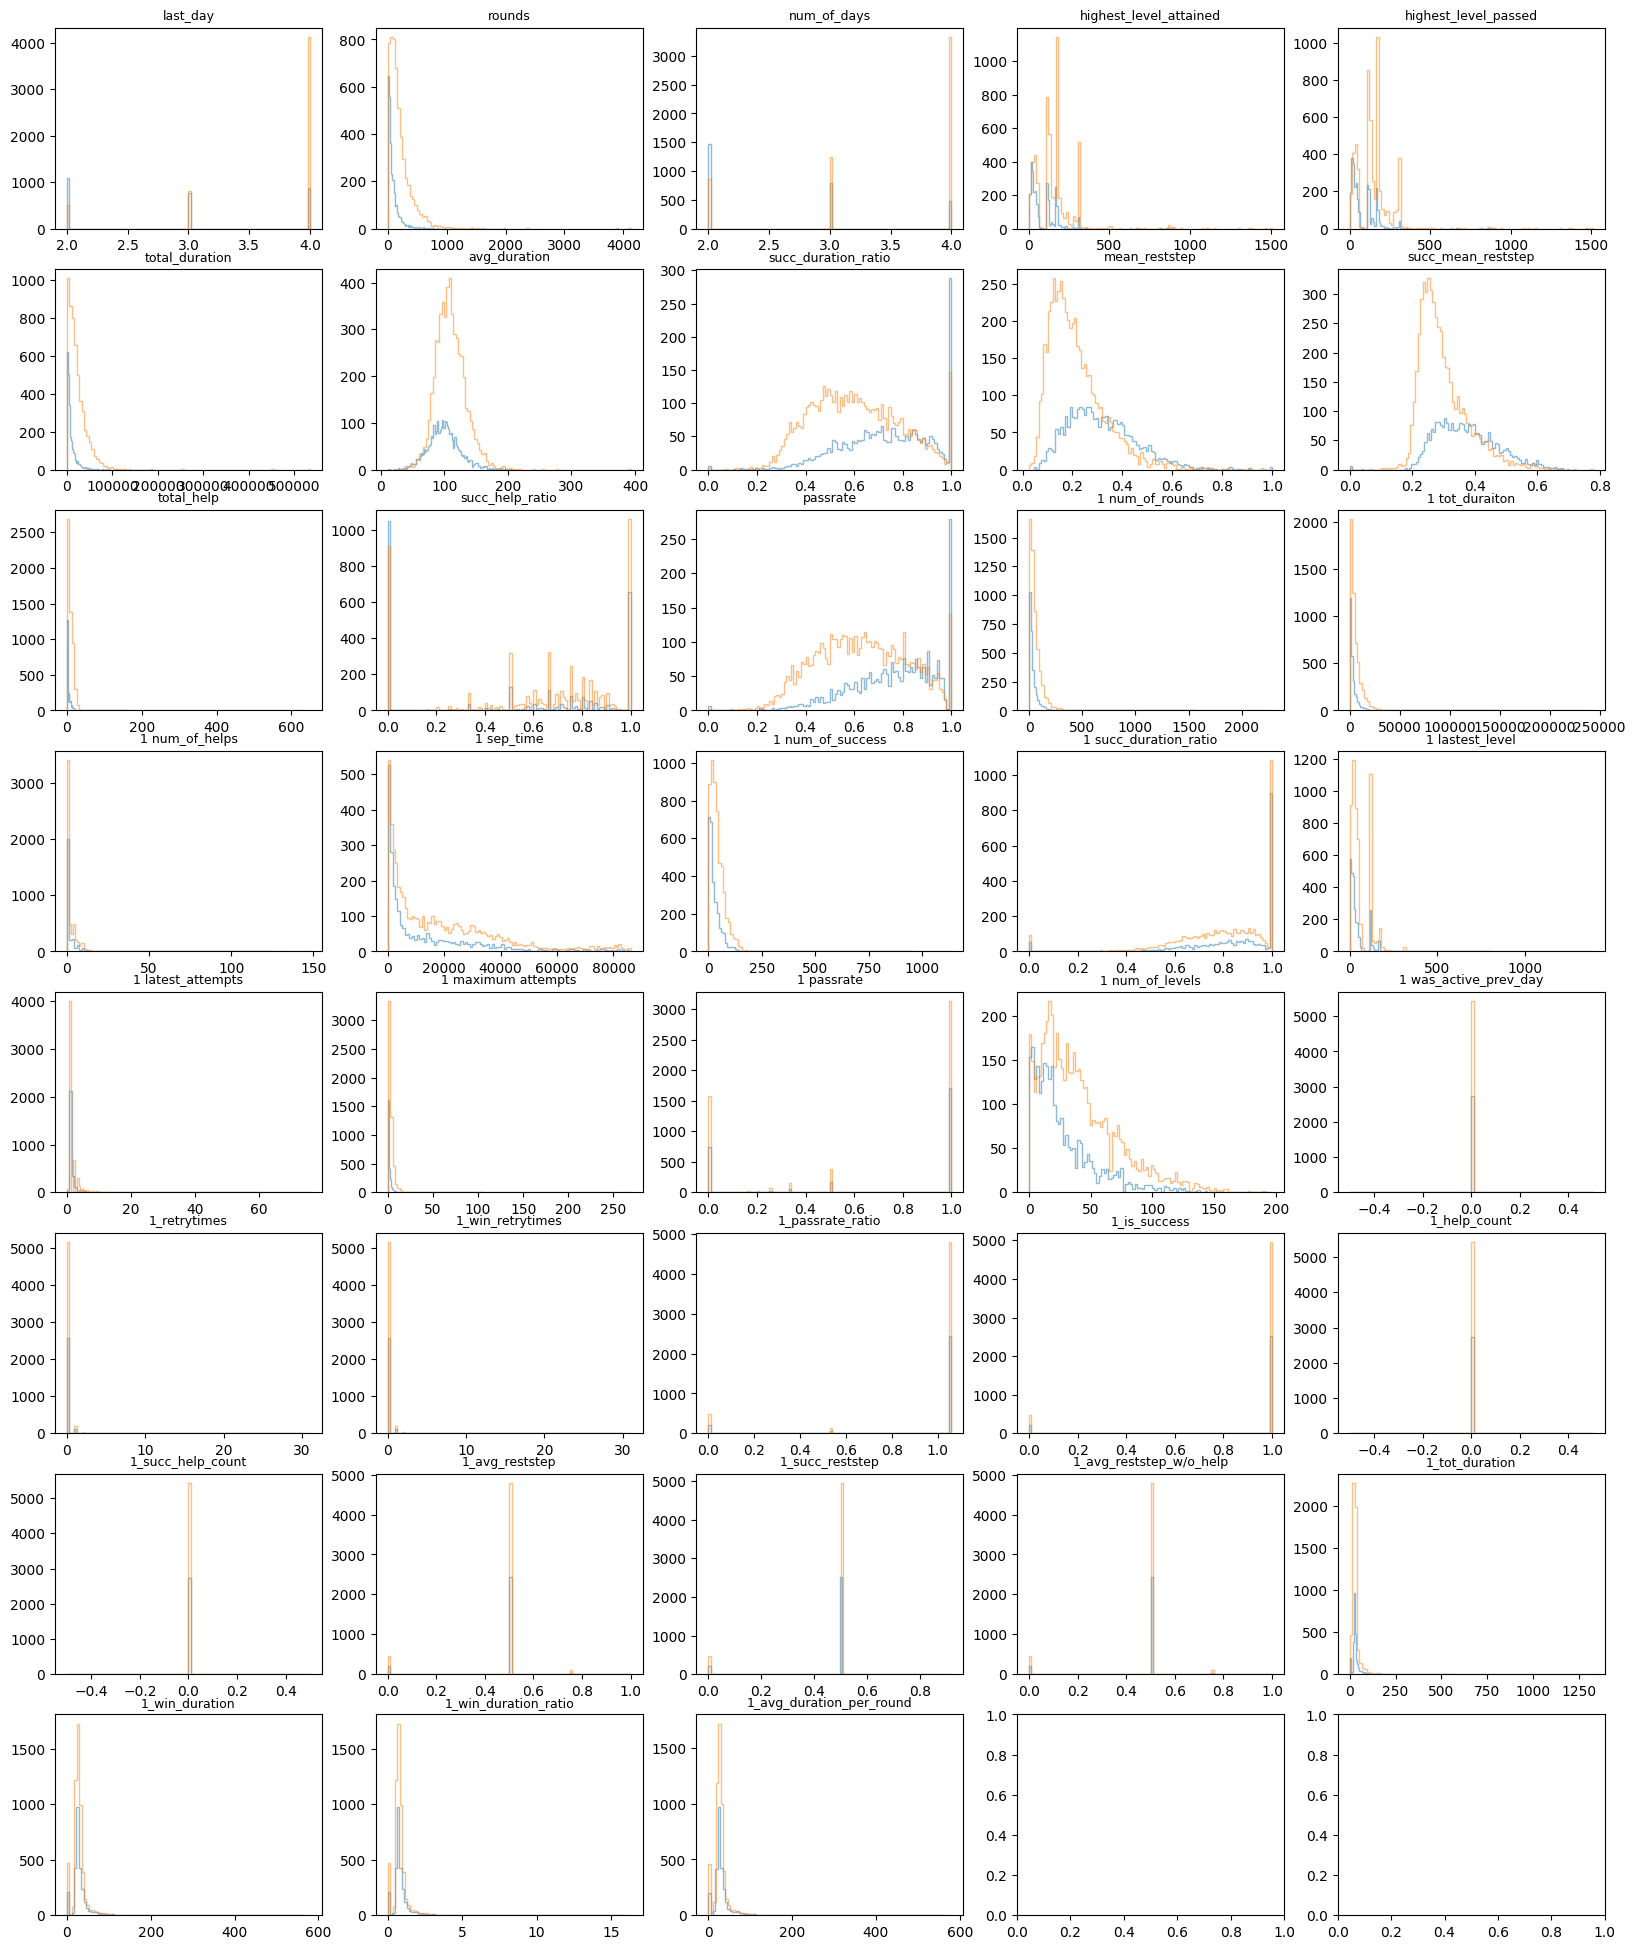

In [35]:
# inspect features
import matplotlib.pyplot as plt

n_general_features = 13
n_day_features = 12
n_level_features = 13

feature_indices = [i for i in range(train_df.shape[1]) 
                      if i<(n_general_features+n_day_features) 
                      or (i >= n_general_features+4*n_day_features and i< n_general_features+4*n_day_features+n_level_features)]

fig, axes = plt.subplots(8,5,figsize=(20,25),dpi=100)
ax = axes.flatten()
for i, c in enumerate(train_df.columns[feature_indices]):
  ax[i].hist(train_df.loc[train_label_df[train_label_df['label']==1]['user_id']-1][c], bins=100,alpha=0.5,histtype='step',cumulative=False)
  ax[i].hist(train_df.loc[train_label_df[train_label_df['label']==0]['user_id']-1][c], bins=100,alpha=0.5,histtype='step',cumulative=False)
  ax[i].set_title(c,fontsize=9)

plt.show()

In [42]:
# discretization
def binning(df, numOfBins, method, column_skips):
  discrete_df = df.copy()

  for c in df.columns[1:]:
    if c in column_skips: continue
    # method 1. trim off the extreme values and cut the range into equal width
    if method == 'equalwidth':
      leave = df.loc[df['label'] == 1][c].tolist()
      stay = df.loc[df['label'] == 0][c].tolist()
      stay.sort()
      leave.sort()
      lower = leave[int(0.01*len(leave))]
      upper = stay[int(0.99*len(stay))]
      step = int((upper - lower)*1000/numOfBins)
      bins = [-np.inf] + [i/1000 for i in list(range(int(lower*1000), int(upper*1000), step))] + [upper, np.inf]
      discrete_df[c] = pd.cut(discrete_df[c], bins, labels = False)

    # method 2. equal frequency
    if method == 'equalfrequency':
      l = df[c].tolist()
      l.sort()
      lower = l[int(0.01*len(l))]
      upper = l[int(0.99*len(l))]
      bins = [-np.inf, lower, upper, np.inf]
      for i in range(1, numOfBins):
        cutting_edge = l[int((i/numOfBins)*len(l))]
        bins.append(cutting_edge)
      bins = list(set(bins))
      bins.sort()
      discrete_df[c] = pd.cut(discrete_df[c], bins, labels = False)

  return discrete_df

In [43]:
column_skips = ['last_day', 'num_of_days', 'highest_level_attained','highest_level_passed','total_help']
for i in range(1,5):
  column_skips.append(str(i)+' num_of_rounds')
  column_skips.append(str(i)+' num_of_helps')
  column_skips.append(str(i)+' num_of_success')
  column_skips.append(str(i)+' lastest_level')
  column_skips.append(str(i)+' latest_attempts')
  column_skips.append(str(i)+' maximum_attempts')
  column_skips.append(str(i)+' num_of_levels')
  column_skips.append(str(i)+' was_active_prev_day')

for lvl in level_ids:
  column_skips.append(str(lvl)+'_retrytimes')
  column_skips.append(str(lvl)+'_win_retrytimes')
  column_skips.append(str(lvl)+'_is_success')
  column_skips.append(str(lvl)+'_help_count')
  column_skips.append(str(lvl)+'_succ_help_count')

discrete_train_df = binning(train_df, 10, 'equalfrequency', column_skips)
discrete_validate_df = binning(validate_df, 10, 'equalfrequency', column_skips)

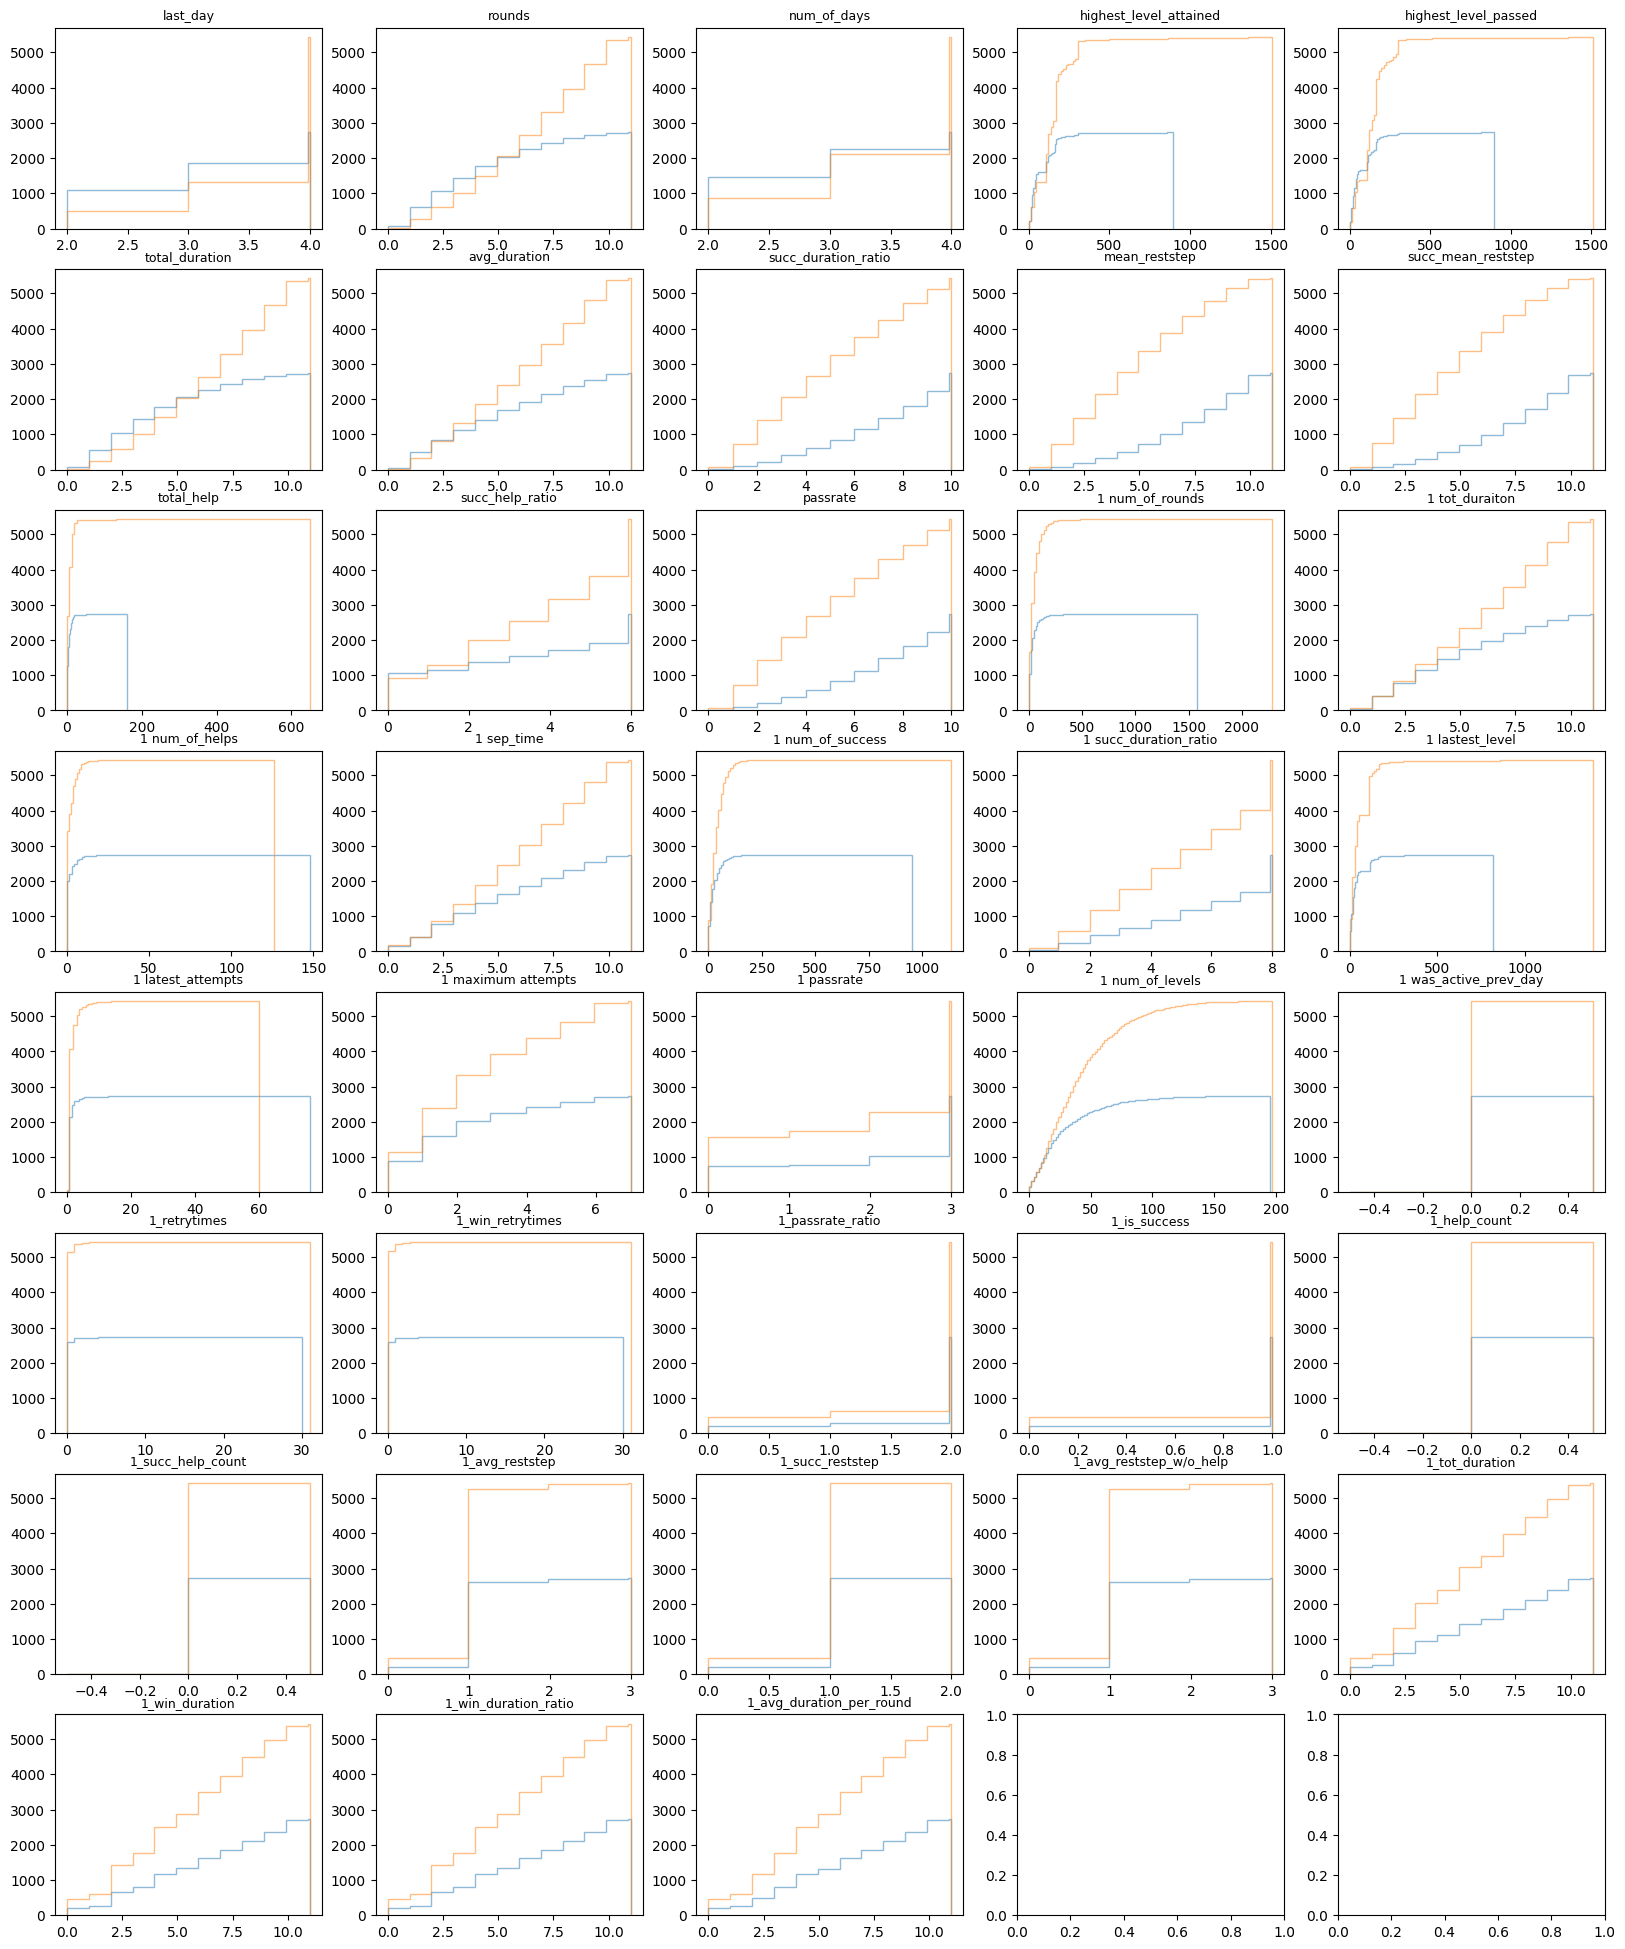

In [45]:
# inspect features
import matplotlib.pyplot as plt

fig, axes = plt.subplots(8,5,figsize=(20,25),dpi=100)
ax = axes.flatten()
for i, c in enumerate(discrete_train_df.columns[feature_indices]):
  ax[i].hist(discrete_train_df.loc[train_label_df[train_label_df['label']==1]['user_id']-1][c], bins=100,alpha=0.5,histtype='step',cumulative=True)
  ax[i].hist(discrete_train_df.loc[train_label_df[train_label_df['label']==0]['user_id']-1][c], bins=100,alpha=0.5,histtype='step',cumulative=True)
  ax[i].set_title(c,fontsize=9)

plt.show()

### Traditional Models

In [9]:
# import packages
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

RANDOM_SEED = 2022

#### Decision Tree

In [49]:
model = DecisionTreeClassifier(max_depth=3)

parameters = {'max_depth':[1,2,3,4,5,7,10,15,20]}

gsearch = GridSearchCV(model, param_grid=parameters, scoring='roc_auc',cv=3)
gsearch.fit(discrete_train_df.values, train_label_df['label'].values)

print("Best score: ", gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print(f"\t{param_name}: {best_parameters[param_name]}")

Best score:  0.7896264985646805
Best parameters set:
	max_depth: 3


In [64]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(discrete_train_df.values, train_label_df['label'].values)
pred = model.predict_proba(discrete_validate_df.values)[:,1]
print("roc_auc_score:", roc_auc_score(validate_label_df['label'].values,pred))

roc_auc_score: 0.7838012149909952


[Text(0.5, 0.875, '4 lastest_level <= 31.5\ngini = 0.445\nsamples = 8158\nvalue = [5428, 2730]'),
 Text(0.25, 0.625, '3 num_of_levels <= 1.5\ngini = 0.489\nsamples = 3604\nvalue = [1534, 2070]'),
 Text(0.125, 0.375, '4 num_of_rounds <= 5.5\ngini = 0.45\nsamples = 2126\nvalue = [727, 1399]'),
 Text(0.0625, 0.125, 'gini = 0.439\nsamples = 1993\nvalue = [648, 1345]'),
 Text(0.1875, 0.125, 'gini = 0.482\nsamples = 133\nvalue = [79, 54]'),
 Text(0.375, 0.375, '3 maximum attempts <= 2.5\ngini = 0.496\nsamples = 1478\nvalue = [807, 671]'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 857\nvalue = [422, 435]'),
 Text(0.4375, 0.125, 'gini = 0.471\nsamples = 621\nvalue = [385, 236]'),
 Text(0.75, 0.625, '4 sep_time <= 2.5\ngini = 0.248\nsamples = 4554\nvalue = [3894, 660]'),
 Text(0.625, 0.375, '3 maximum attempts <= 1.5\ngini = 0.38\nsamples = 1352\nvalue = [1007, 345]'),
 Text(0.5625, 0.125, 'gini = 0.452\nsamples = 501\nvalue = [328, 173]'),
 Text(0.6875, 0.125, 'gini = 0.323\nsamples = 851\nv

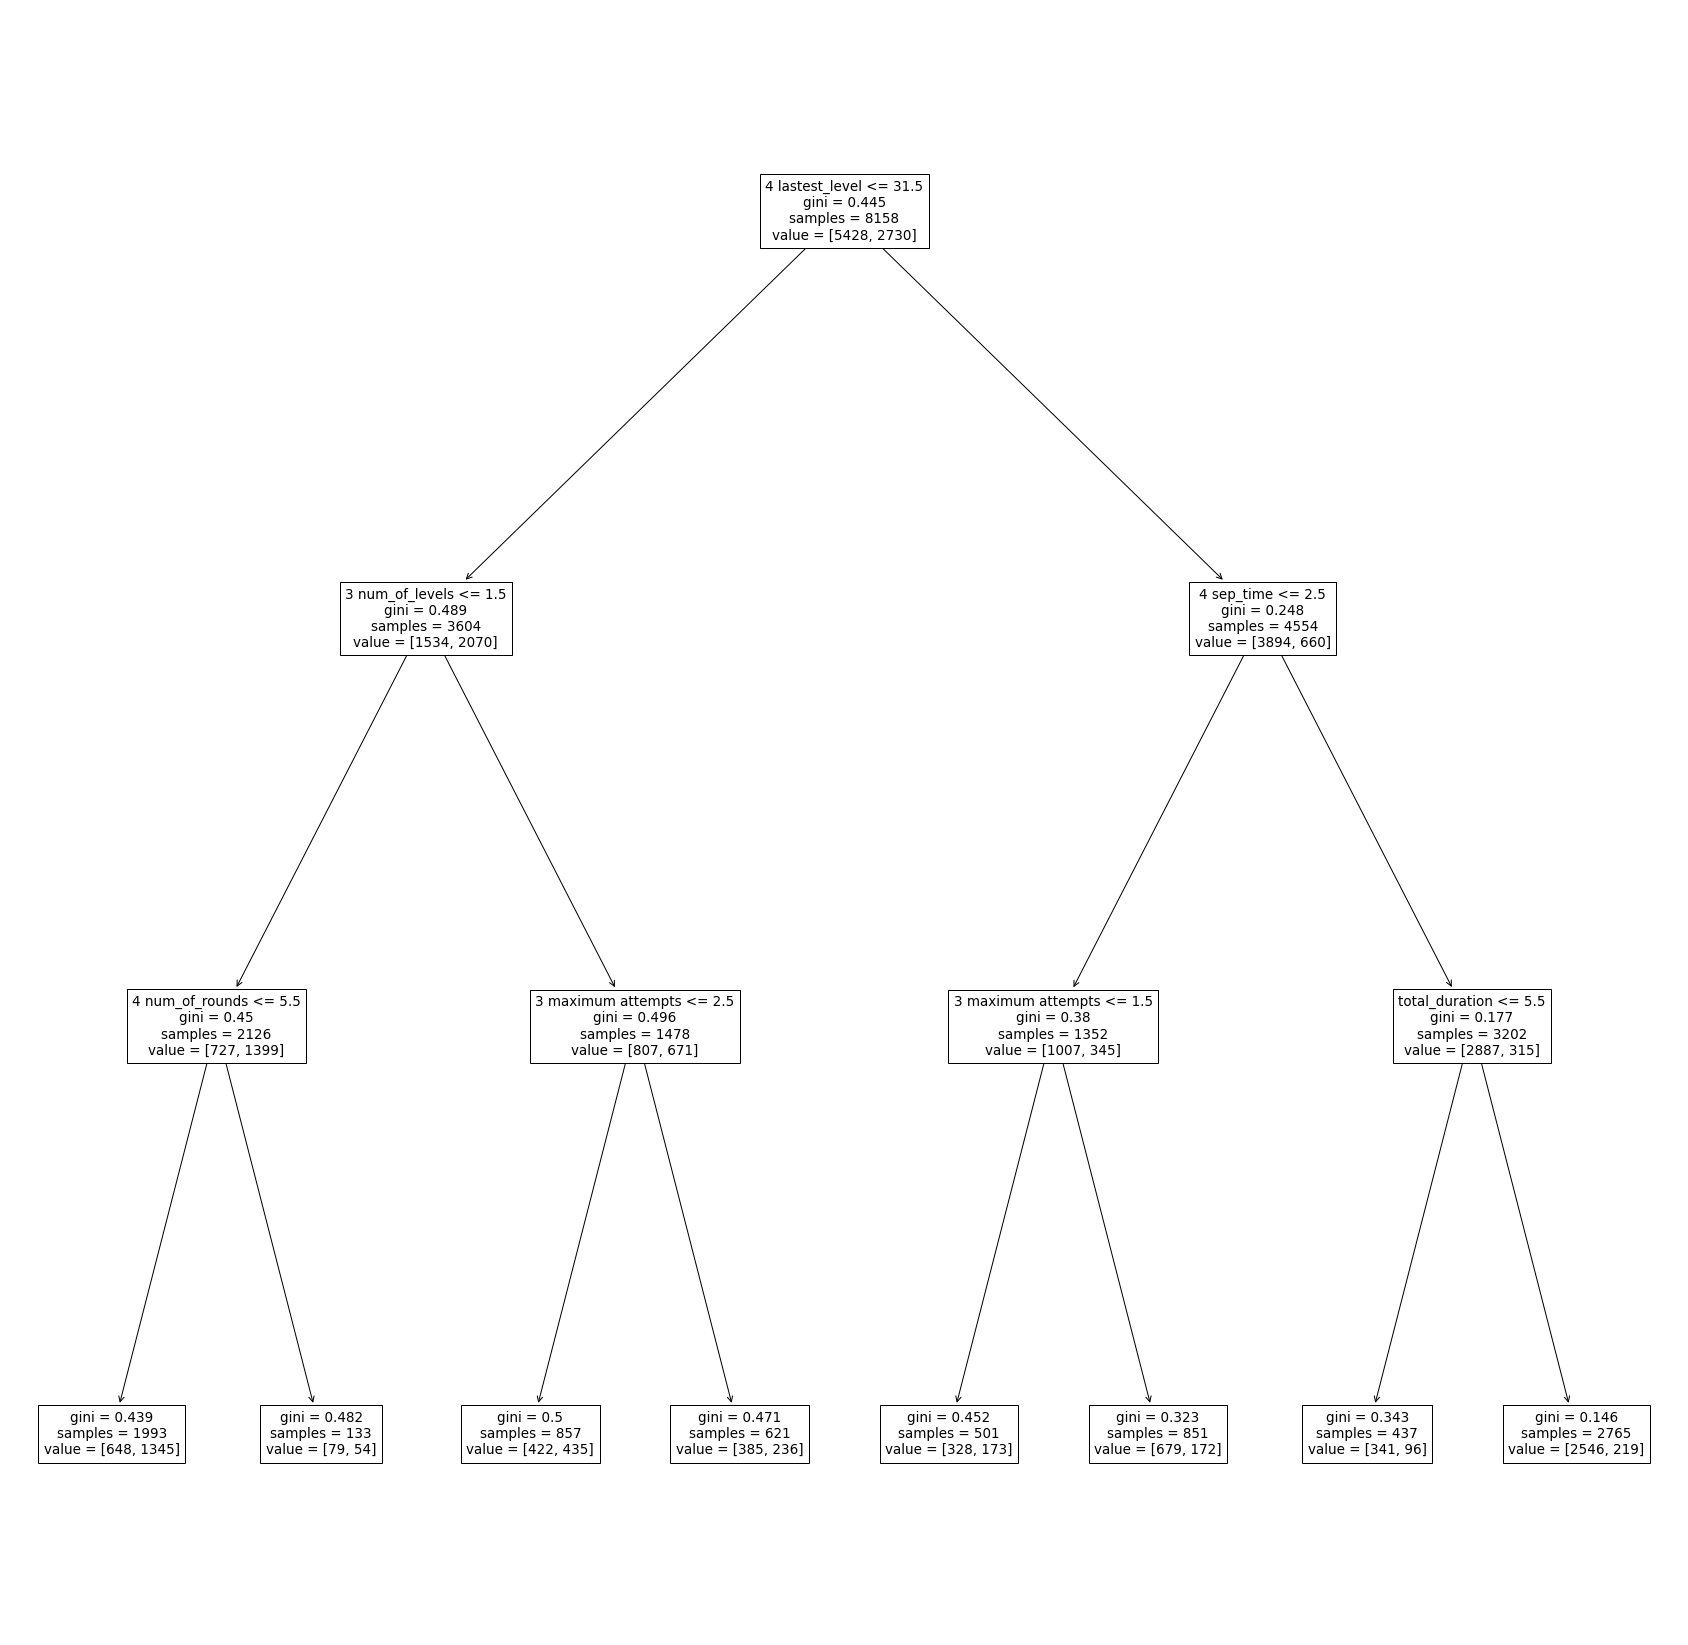

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
plot_tree(model,feature_names=train_df.columns)

#### Bayes Classifier

In [53]:
model = MultinomialNB()
model.fit(train_df.values, train_label_df['label'].values)
pred = model.predict_proba(validate_df.values)[:,1]
print("MultinomialNB")
print("roc_auc_score:", roc_auc_score(validate_label_df['label'].values,pred))

model = BernoulliNB()
model.fit(train_df.values, train_label_df['label'].values)
pred = model.predict_proba(validate_df.values)[:,1]
print("BernoulliNB")
print("roc_auc_score:", roc_auc_score(validate_label_df['label'].values,pred))

model = ComplementNB()
model.fit(train_df.values, train_label_df['label'].values)
pred = model.predict_proba(validate_df.values)[:,1]
print("ComplementNB")
print("roc_auc_score:", roc_auc_score(validate_label_df['label'],pred))

MultinomialNB
roc_auc_score: 0.7043820911060057
BernoulliNB
roc_auc_score: 0.6997634955658577
ComplementNB
roc_auc_score: 0.7046221329996329


#### SVM

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

model = LinearSVC(dual=False)
parameters = {'C':[0.0001,0.001,0.01,0.1,1,10,100]}

gsearch = GridSearchCV(model, param_grid=parameters, scoring='roc_auc',cv=3)
gsearch.fit(scaler.fit_transform(train_df), train_label_df['label'].values)

print("Best score: ", gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print(f"\t{param_name}: {best_parameters[param_name]}")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Best score:  0.7969246997338585
Best parameters set:
	C: 0.001


In [59]:
model = LinearSVC(C=0.01)
model.fit(scaler.fit_transform(train_df), train_label_df['label'].values)
pred = model.predict(scaler.fit_transform(validate_df))
print("roc_auc_score:", roc_auc_score(validate_label_df['label'].values,pred))

roc_auc_score: 0.7007053441537481


#### Gradient Boosted Learning

In [7]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators = 80,
    max_depth = 3,
    learning_rate = 0.1
)

In [72]:
model.fit(scaler.fit_transform(train_df), train_label_df['label'].values)
pred = model.predict_proba(scaler.fit_transform(validate_df))[:,1]
print("roc_auc_score:", roc_auc_score(validate_label_df['label'].values, pred))

roc_auc_score: 0.7897195110472964


In [37]:
parameters = {
              'learning_rate': [0.001,0.01,0.05,0.1,0.2,0.3,0.5,1]
              }

gsearch = GridSearchCV(model, param_grid=parameters, scoring='roc_auc',cv=3)
gsearch.fit(scaler.fit_transform(train_df.values), train_label_df['label'].values)

print("Best score: ", gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print(f"\t{param_name}: {best_parameters[param_name]}")

Best score:  0.8037169589890792
Best parameters set:
	learning_rate: 0.05


In [21]:
model = XGBClassifier(learning_rate = 0.05)

model.fit(scaler.fit_transform(train_df), train_label_df['label'].values)
pred = model.predict_proba(scaler.fit_transform(validate_df))[:,1]
print("roc_auc_score:", roc_auc_score(validate_label_df['label'].values, pred))

roc_auc_score: 0.7949824295650756


### Neural Network

#### MLP

In [87]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(x_train_general.numpy(), train_label_df['label'].values)
pred = model.predict(x_validate_general.numpy())
print("roc_auc_score:", roc_auc_score(validate_label_df['label'].values,pred))

roc_auc_score: 0.7094419215479922


In [88]:
parameters = {
              'hidden_layer_sizes':[2,4,8,16,32,64,15,17,19,20,32,50,60,70,80,90,100,128,256],
              'activation': ['tanh','relu']
              }

gsearch = GridSearchCV(model, param_grid=parameters, scoring='roc_auc',cv=3)
gsearch.fit(x_train_general.numpy(),train_label_df['label'].values)

print("Best score: ", gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print(f"\t{param_name}: {best_parameters[param_name]}")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Best score:  0.7985892073327823
Best parameters set:
	activation: relu
	hidden_layer_sizes: 64


### Recurrent Neural Network

In [23]:
import os
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import Sequence, plot_model
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Masking, Input, Dropout


# Parameters
seq_len = len(level_ids)
lstm_units = 128
BATCH_SIZE = 32
NUM_EPOCHS = 128

In [28]:
x_train_general = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/train_general.npy')
x_validate_general = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/validate_general.npy')
x_test_general = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/test_general.npy')

In [29]:
x_train_general = tf.convert_to_tensor(x_train_general)
x_validate_general = tf.convert_to_tensor(x_validate_general)
x_test_general = tf.convert_to_tensor(x_test_general)

#### Level Model

In [11]:
train_df = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/train_lvl.npy')
validate_df = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/validate_lvl.npy')
test_df = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/test_lvl.npy')

In [12]:
# filter the NaN entries

train_df = np.array([i[~np.isnan(i)]for i in train_df],dtype=object)
validate_df = np.array([i[~np.isnan(i)]for i in validate_df],dtype=object)
test_df = np.array([i[~np.isnan(i)]for i in test_df],dtype=object)

In [69]:
# reshape each input sample
n_features_lvl = 13
x_train_lvl = []
for r in train_df:
    x_train_lvl.append(np.reshape(r, (int(len(r)/n_features_lvl), n_features_lvl)))
x_train_lvl = np.array(x_train_lvl,dtype=object)

x_validate_lvl = []
for r in validate_df:
    x_validate_lvl.append(np.reshape(r, (int(len(r)/n_features_lvl), n_features_lvl)))
x_validate_lvl = np.array(x_validate_lvl,dtype=object)

x_test_lvl = []
for r in test_df:
    x_test_lvl.append(np.reshape(r, (int(len(r)/n_features_lvl), n_features_lvl)))
x_test_lvl = np.array(x_test_lvl, dtype=object)

In [71]:
np.save('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/x_train_lvl.npy',x_train_lvl)
np.save('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/x_validate_lvl.npy', x_validate_lvl)
np.save('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/x_test_lvl.npy', x_test_lvl)

In [31]:
x_train_lvl = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/x_train_lvl.npy',allow_pickle=True)
x_validate_lvl = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/x_validate_lvl.npy',allow_pickle=True)
x_test_lvl = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/x_test_lvl.npy',allow_pickle=True)

In [32]:
# convert to tensor
x_train_lvl = tf.ragged.constant(x_train_lvl)
x_validate_lvl = tf.ragged.constant(x_validate_lvl)
x_test_lvl = tf.ragged.constant(x_test_lvl)

In [11]:
# Batch Generator class for generating sequences with batch_size = 1
# Each user would have completed different number of levels, which means the sequence length is varying between users
# => Cannot pass in batch by batch

class MyBatchGenerator(Sequence):
  def __init__(self, X, y, batch_size=1, shuffle=True):
    self.X = X
    self.y = y
    self.batch_size = batch_size
    self.shuffle = shuffle
    self.on_epoch_end()

  def __len__(self):
    # Denotes the number of batches per epoch
    return int(np.floor(len(self.y)/self.batch_size))
  
  def __getitem__(self, index):
    return self.__data_generation(index)
  
  def on_epoch_end(self):
    # Shuffles indexes after each epoch
    self.indexes = np.arange(len(self.y))
    if self.shuffle == True:
      np.random.shuffle(self.indexes)

  def __data_generation(self, index):
    # * unpacks a list or tuple into position arguments
    Xb = np.empty((self.batch_size, *self.X[index].to_tensor().shape))
    yb = np.empty((self.batch_size, *self.y[index].shape))
    # naively use the same sample over and over again
    for s in range(0, self.batch_size):
      Xb[s] = self.X[index].to_tensor()
      yb[s] = self.y[index]
    return Xb, yb

In [12]:
# Batch size = 1

n_level_features = 13

model1 = Sequential(name="level_model")
model1.add(LSTM(lstm_units, input_shape=(None, n_level_features)))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=[tf.keras.metrics.MeanSquaredError(),
                       tf.keras.metrics.AUC()])
print(model1.summary())

Model: "level_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               72704     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 72,833
Trainable params: 72,833
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# Create a callback that saves the model's weights
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/models/level_models/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=4,
                                                   mode='min')

model1.fit(MyBatchGenerator(x_train_lvl, train_label_df['label'].values), 
           epochs=64,
          validation_data = MyBatchGenerator(x_validate_lvl, validate_label_df['label'].values),
          callbacks=[early_stopping,
                     cp_callback])

Epoch 1/64
8154/8158 [============================>.] - ETA: 0s - loss: 0.2010 - mean_squared_error: 0.2010 - auc: 0.6922
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/models/level_models/cp.ckpt
8158/8158 [==============================] - 136s 16ms/step - loss: 0.2010 - mean_squared_error: 0.2010 - auc: 0.6923 - val_loss: 0.1871 - val_mean_squared_error: 0.1871 - val_auc: 0.7442
Epoch 2/64
8154/8158 [============================>.] - ETA: 0s - loss: 0.1889 - mean_squared_error: 0.1889 - auc: 0.7356
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/models/level_models/cp.ckpt
8158/8158 [==============================] - 123s 15ms/step - loss: 0.1889 - mean_squared_error: 0.1889 - auc: 0.7357 - val_loss: 0.1870 - val_mean_squared_error: 0.1870 - val_auc: 0.7477
Epoch 3/64
8155/8158 [============================>.] - ETA: 0s - loss: 0.1876 - mean_squared_error: 0.1876 - auc: 0.7412
Epoch 3: saving model to /content/drive/MyDrive/Co

In [ ]:
# reload the model
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/models/level_models/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Load the previously saved weights
model1.load_weights(checkpoint_path)

In [ ]:
x_train_lvl.shape

#### Day Model

In [15]:
train_df = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/train_day.npy')
validate_df = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/validate_day.npy')
test_df = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/test_day.npy')

In [16]:
# reshape inputs
n_features_day = 12
seq_len = 4

x_train_day = np.reshape(train_df, (train_df.shape[0], seq_len, n_features_day))
x_validate_day = np.reshape(validate_df, (validate_df.shape[0], seq_len, n_features_day))
x_test_day = np.reshape(test_df, (test_df.shape[0], seq_len, n_features_day))

In [76]:
np.save('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/x_train_day.npy',x_train_day)
np.save('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/x_validate_day.npy',x_validate_day)
np.save('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/x_test_day.npy',x_test_day)

In [33]:
x_train_day = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/x_train_day.npy',allow_pickle=True)
x_validate_day = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/x_validate_day.npy',allow_pickle=True)
x_test_day = np.load('/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/data/preprocessed/x_test_day.npy',allow_pickle=True)

In [34]:
# convert to tensor
x_train_day = tf.ragged.constant(x_train_day)
x_validate_day = tf.ragged.constant(x_validate_day)
x_test_day = tf.ragged.constant(x_test_day)

In [61]:
# modeling
n_features_day = 12
model2 = Sequential(name="day_model")
model2.add(LSTM(lstm_units, input_shape=(seq_len, n_features_day)))
model2.add(Dense(1, activation='sigmoid'))


model2.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=[tf.keras.metrics.MeanSquaredError(),
                       tf.keras.metrics.AUC()])
print(model2.summary())

Model: "day_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               72192     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 72,321
Trainable params: 72,321
Non-trainable params: 0
_________________________________________________________________
None


In [62]:
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/models/day_model/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model2.fit(x = x_train_day,
           y = train_label_df['label'].values, 
           validation_data = (x_validate_day, validate_label_df['label'].values),
           batch_size = BATCH_SIZE, 
           epochs=20, 
           callbacks=[cp_callback])

Epoch 1/20
254/255 [============================>.] - ETA: 0s - loss: 0.1744 - mean_squared_error: 0.1744 - auc: 0.7817
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/models/day_model/cp.ckpt
255/255 [==============================] - 7s 11ms/step - loss: 0.1743 - mean_squared_error: 0.1743 - auc: 0.7821 - val_loss: 0.1719 - val_mean_squared_error: 0.1719 - val_auc: 0.7930
Epoch 2/20
250/255 [============================>.] - ETA: 0s - loss: 0.1697 - mean_squared_error: 0.1697 - auc: 0.7935
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/models/day_model/cp.ckpt
255/255 [==============================] - 2s 7ms/step - loss: 0.1695 - mean_squared_error: 0.1695 - auc: 0.7941 - val_loss: 0.1721 - val_mean_squared_error: 0.1721 - val_auc: 0.7938
Epoch 3/20
254/255 [============================>.] - ETA: 0s - loss: 0.1673 - mean_squared_error: 0.1673 - auc: 0.8002
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/ML lab/

In [63]:
pred = model2.predict(x_validate_day)
print("roc_auc_score:", roc_auc_score(validate_label_df['label'].values, pred))

roc_auc_score: 0.7899197565217172


#### Composed Model

In [15]:
class MyBatchGenerator2(Sequence):
  def __init__(self, X1, X2, y=None, batch_size=1, shuffle=True):
    self.X1 = X1
    self.X2 = X2
    self.y = y
    self.sample_size = len(self.y)
    self.batch_size = batch_size
    self.shuffle = shuffle
    self.on_epoch_end()

  def __len__(self):
    # Denotes the number of batches per epoch
    return int(np.floor(self.sample_size/self.batch_size))
  
  def __getitem__(self, index):
    # Should return a complete batch
    return self.__data_generation(index)
  
  def on_epoch_end(self):
    # Shuffles indexes after each epoch
    self.indexes = np.arange(self.sample_size)
    if self.shuffle == True:
      np.random.shuffle(self.indexes)

  def __data_generation(self, index):
    # * unpacks a list or tuple into position arguments
    Xb1 = np.empty((self.batch_size, *self.X1[index].to_tensor().shape))
    Xb2 = np.empty((self.batch_size, *self.X2[index].to_tensor().shape))
    yb = np.empty((self.batch_size, *self.y[index].shape))
    # naively use the same sample over and over again
    for s in range(0, self.batch_size):
      Xb1[s] = self.X1[index].to_tensor()
      Xb2[s] = self.X2[index].to_tensor()
      yb[s] = self.y[index]
    return [Xb1, Xb2], yb

In [52]:
x_train_day.shape, x_train_lvl.shape

(TensorShape([8158, None, None]), TensorShape([8158, None, None]))

In [59]:
X_general = tf.concat([x_train_general, x_validate_general], axis=0)
X_lvl = tf.concat([x_train_lvl, x_validate_lvl], axis=0)
X_day = tf.concat([x_train_day, x_validate_day], axis=0)

In [21]:
X_day.shape

TensorShape([10816, None, None])

In [60]:
y = np.concatenate((train_label_df['label'].values, validate_label_df['label'].values), axis=0)
y.shape

(10816,)

In [24]:
type(x_train_general), x_train_lvl.shape, x_train_day.shape

(tensorflow.python.framework.ops.EagerTensor,
 TensorShape([8158, None, None]),
 TensorShape([8158, None, None]))

##### Composed Model: Level LSTM + Day LSTM

In [16]:
# Model definition
lstm_units = 128
n_level_features = 13
n_day_features = 12

class MyModel(Model):

  def __init__(self):
    super().__init__()
    # self.dense = Dense(16, input_shape = None)
    self.lstm_lvl = LSTM(lstm_units, input_shape=(None, n_level_features), name="lstm_lvl", dtype = 'float64')
    self.lstm_day = LSTM(lstm_units, input_shape=(None, n_day_features), name="lstm_day", dtype = 'float64')
    # self.dense1 = Dense(65, activation='relu')
    self.dense2 = Dense(1, activation='sigmoid')
  
  # forward pass
  def call(self, inputs):
    # print(type(inputs))
    input1, input2 = inputs
    # print(input1.shape, input2.shape)
    lvl_output = self.lstm_lvl(input1)
    day_output = self.lstm_day(input2)
    out1 = tf.keras.layers.concatenate([lvl_output, day_output],axis=1)
    # out2 = self.dense1(out1)
    return self.dense2(out1)


In [17]:
myModel = MyModel()

In [22]:
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/models/checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=2,
                                                   mode='min')

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 # save_best_only=True,
                                                 verbose=1)

myModel.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=tf.keras.metrics.MeanSquaredError())

# myModel(x_train_lvl[:1], x_train_day[:1])
# print(myModel.summary())

myModel.fit(MyBatchGenerator2(x_train_lvl, x_train_day, train_label_df['label'].values), 
            epochs=128,
            validation_data = MyBatchGenerator2(x_validate_lvl, x_validate_day, validate_label_df['label'].values),
            callbacks=[early_stopping, cp_callback])

Epoch 1/128
8156/8158 [============================>.] - ETA: 0s - loss: 0.1821 - mean_squared_error: 0.1821
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/models/checkpoints/cp.ckpt
8158/8158 [==============================] - 225s 27ms/step - loss: 0.1821 - mean_squared_error: 0.1821 - val_loss: 0.1721 - val_mean_squared_error: 0.1721
Epoch 2/128
8156/8158 [============================>.] - ETA: 0s - loss: 0.1698 - mean_squared_error: 0.1698
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/models/checkpoints/cp.ckpt
8158/8158 [==============================] - 222s 27ms/step - loss: 0.1697 - mean_squared_error: 0.1697 - val_loss: 0.1736 - val_mean_squared_error: 0.1736
Epoch 3/128
8156/8158 [============================>.] - ETA: 0s - loss: 0.1687 - mean_squared_error: 0.1687
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/models/checkpoints/cp.ckpt
8158/8158 [==============================] - 223s 27

##### Composed Model: General MLP + Level LSTM + Day LSTM 

In [26]:

class MyBatchGenerator3(Sequence):

  def __init__(self, X1, X2, X3, y, batch_size=1, shuffle=True):
    # X1: general features, X2: level features, X3: day features
    self.X1 = X1
    self.X2 = X2
    self.X3 = X3
    self.y = y
    self.sample_size = len(self.y)
    self.batch_size = batch_size
    self.shuffle = shuffle
    self.on_epoch_end()

  def __len__(self):
    # Denotes the number of batches per epoch
    return int(np.floor(self.sample_size/self.batch_size))
  
  def __getitem__(self, index):
    # Should return a complete batch
    return self.__data_generation(index)
  
  def on_epoch_end(self):
    # Shuffles indexes after each epoch
    self.indexes = np.arange(self.sample_size)
    if self.shuffle == True:
      np.random.shuffle(self.indexes)

  def __data_generation(self, index):
    Xb1 = np.empty((self.batch_size, *self.X1[index].shape))
    Xb2 = np.empty((self.batch_size, *self.X2[index].to_tensor().shape))
    Xb3 = np.empty((self.batch_size, *self.X3[index].to_tensor().shape))
    yb = np.empty((self.batch_size, *self.y[index].shape))
    for s in range(0, self.batch_size):
      Xb1[s] = self.X1[index]
      Xb2[s] = self.X2[index].to_tensor()
      Xb3[s] = self.X3[index].to_tensor()
      yb[s] = self.y[index]
    return [Xb1, Xb2, Xb3], yb

In [25]:
# Model Definition
lstm_units = 128
n_level_features = 13
n_day_features = 12
n_general_features = 13

class MyModel2(Model):

  def __init__(self):
    super().__init__()
    # mlp
    self.mlp_hidden_1 = Dense(128, activation = 'relu', input_dim = n_general_features)
    self.mlp_hidden_2 = Dense(64, activation = 'relu')
    # lstm
    self.lstm_lvl = LSTM(lstm_units, input_shape=(None, n_level_features), name="lstm_lvl", dtype = 'float64')
    self.lstm_day = LSTM(lstm_units, input_shape=(None, n_day_features), name="lstm_day", dtype = 'float64')
    # combine the output
    self.dense1 = Dense(32, activation='relu')
    self.dense2 = Dense(1, input_shape=(None, 32), activation='sigmoid')
  
  # forward pass
  def call(self, inputs):
    input_general, input_lvl, input_day = inputs
    general_output1 = self.mlp_hidden_1(input_general)
    general_output2 = self.mlp_hidden_2(general_output1)
    lvl_output = self.lstm_lvl(input_lvl)
    day_output = self.lstm_day(input_day)
    concat = tf.keras.layers.concatenate([general_output2, lvl_output, day_output],axis=1)
    out = self.dense1(concat)
    return self.dense2(out)


In [21]:
myModel2 = MyModel2()

In [50]:
myModel2.summary()

Model: "my_model2_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             multiple                  1792      
                                                                 
 dense_6 (Dense)             multiple                  8256      
                                                                 
 lstm_lvl (LSTM)             multiple                  72704     
                                                                 
 lstm_day (LSTM)             multiple                  72192     
                                                                 
 dense_7 (Dense)             multiple                  321       
                                                                 
Total params: 155,265
Trainable params: 155,265
Non-trainable params: 0
_________________________________________________________________


In [31]:
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/models/checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=8,
                                                   mode='min')

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 # save_best_only=True,
                                                 verbose=1)

myModel2.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=[tf.keras.metrics.MeanSquaredError(),
                       tf.keras.metrics.AUC()])


myModel2.fit(MyBatchGenerator3(X1=x_train_general, X2=x_train_lvl, X3=x_train_day, y=train_label_df['label'].values), 
            epochs=64,
            validation_data = MyBatchGenerator3(X1=x_validate_general, X2=x_validate_lvl, X3=x_validate_day, y=validate_label_df['label'].values),
            callbacks=[early_stopping, cp_callback])

Epoch 1/64
8158/8158 [==============================] - ETA: 0s - loss: 0.1852 - mean_squared_error: 0.1852
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/models/checkpoints/cp.ckpt
8158/8158 [==============================] - 371s 45ms/step - loss: 0.1852 - mean_squared_error: 0.1852 - val_loss: 0.1795 - val_mean_squared_error: 0.1795
Epoch 2/64
8158/8158 [==============================] - ETA: 0s - loss: 0.1787 - mean_squared_error: 0.1787
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/models/checkpoints/cp.ckpt
8158/8158 [==============================] - 375s 46ms/step - loss: 0.1787 - mean_squared_error: 0.1787 - val_loss: 0.1703 - val_mean_squared_error: 0.1703
Epoch 3/64
8157/8158 [============================>.] - ETA: 0s - loss: 0.1745 - mean_squared_error: 0.1745
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/models/checkpoints/cp.ckpt
8158/8158 [==============================] - 365s 45ms/

In [32]:
pred = myModel2.predict([x_validate_general, x_validate_lvl, x_validate_day])
print("roc_auc_score:", roc_auc_score(validate_label_df['label'].values, pred))

roc_auc_score: 0.7956194881169787


In [33]:
test_pred = myModel2.predict([x_test_general, x_test_lvl, x_test_day])

In [34]:
test_label_df['proba'] = test_pred

result_path = '/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/result.csv'
save_result(test_label_df, result_path)

##### Hyperparameter Tuning

In [19]:
# added paramters at model initialization stage
n_level_features = 13
n_day_features = 12
n_general_features = 13

class MyModel_test(Model):

  def __init__(self, mlp_hidden_units, lstm_units, dense_units):
    super().__init__()
    self.mlp_hidden_1 = Dense(mlp_hidden_units[0], activation = 'relu', input_dim = n_general_features)
    self.mlp_hidden_2 = Dense(mlp_hidden_units[1], activation = 'relu')
    self.lstm_lvl = LSTM(lstm_units[0], input_shape=(None, n_level_features), name="lstm_lvl", dtype = 'float64')
    self.lstm_day = LSTM(lstm_units[1], input_shape=(None, n_day_features), name="lstm_day", dtype = 'float64')
    self.dense1 = Dense(dense_units, activation='relu')
    self.dense2 = Dense(1, input_shape=(None, dense_units), activation='sigmoid')
  
  # forward pass
  def call(self, inputs):
    input_general, input_lvl, input_day = inputs
    general_output1 = self.mlp_hidden_1(input_general)
    general_output2 = self.mlp_hidden_2(general_output1)
    lvl_output = self.lstm_lvl(input_lvl)
    day_output = self.lstm_day(input_day)
    concat = tf.keras.layers.concatenate([general_output2, lvl_output, day_output],axis=1)
    out = self.dense1(concat)
    return self.dense2(out)


In [39]:
scores = []
combinations = []
parameters = {
    'mlp_hidden_units': [4,8,16,32,64,128],
    'lstm_units_day': [4,8,16,32,64,128],
    'lstm_units_lvl': [8,16,32,64,128,256],
    'dense_units':[4,8,16,32,64]
}

In [ ]:
for mlp_hidden_units in parameters['mlp_hidden_units']:
  for lstm_units_day in parameters['lstm_units_day']:
    for lstm_units_lvl in parameters['lstm_units_lvl']:
      for dense_units in parameters['dense_units']:
        print(f"mlp_hidden_units: {mlp_hidden_units}\tlstm_units_day: {lstm_units_day}\tlstm_units_lvl: {lstm_units_lvl}\tdense_units: {dense_units}")
        combinations.append([mlp_hidden_units, lstm_units_day, lstm_units_lvl, dense_units])
        model_t = MyModel_test([mlp_hidden_units, mlp_hidden_units],[lstm_units_lvl, lstm_units_day],dense_units)
        model_t.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(learning_rate=0.01), metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.AUC()])
        model_t.fit(MyBatchGenerator3(X1=x_train_general[:1000], X2=x_train_lvl[:1000], X3=x_train_day[:1000], y=train_label_df['label'].values[:1000]))     
        pred = model_t.predict([x_validate_general[:100], x_validate_lvl[:100], x_validate_day[:100]])
        score = roc_auc_score(validate_label_df['label'].values[:100], pred)
        scores.append(score)
        print("roc_auc_score:", score)
          

mlp_hidden_units: 4	lstm_units_day: 4	lstm_units_lvl: 8	dense_units: 4
1000/1000 [==============================] - 25s 22ms/step - loss: 0.1878 - mean_squared_error: 0.1878 - auc_2: 0.7139
roc_auc_score: 0.8455560951918406
mlp_hidden_units: 4	lstm_units_day: 4	lstm_units_lvl: 8	dense_units: 8
1000/1000 [==============================] - 26s 23ms/step - loss: 0.1920 - mean_squared_error: 0.1920 - auc_3: 0.7033
roc_auc_score: 0.8445847498785819
mlp_hidden_units: 4	lstm_units_day: 4	lstm_units_lvl: 8	dense_units: 16
1000/1000 [==============================] - 31s 27ms/step - loss: 0.1871 - mean_squared_error: 0.1871 - auc_4: 0.7201
roc_auc_score: 0.8392423506556581
mlp_hidden_units: 4	lstm_units_day: 4	lstm_units_lvl: 8	dense_units: 32
1000/1000 [==============================] - 27s 24ms/step - loss: 0.1886 - mean_squared_error: 0.1886 - auc_5: 0.7150
roc_auc_score: 0.8431277319086935
mlp_hidden_units: 4	lstm_units_day: 4	lstm_units_lvl: 8	dense_units: 64
1000/1000 [===================

##### Regularization

In [61]:
# add dropout layer

mlp_hidden_units = 64
lstm_units_lvl = 4
lstm_units_day = 16
dense_units = 64
n_level_features = 13
n_day_features = 12
n_general_features = 13

class MyModel3(Model):

  def __init__(self):
    super().__init__()
    # mlp
    self.mlp_hidden_1 = Dense(mlp_hidden_units, activation = 'relu', input_dim = n_general_features)
    self.mlp_hidden_2 = Dense(mlp_hidden_units, activation = 'relu')
    self.drop1 = Dropout(0.2, input_shape=(None, mlp_hidden_units))
    # lstm
    self.lstm_lvl = LSTM(lstm_units_lvl, input_shape=(None, n_level_features), name="lstm_lvl", dtype = 'float64')
    self.drop2 = Dropout(0.2, input_shape=(None, lstm_units_lvl))
    self.lstm_day = LSTM(lstm_units_day, input_shape=(None, n_day_features), name="lstm_day", dtype = 'float64')
    self.drop3 = Dropout(0.2, input_shape=(None, lstm_units_day))
    # combine
    self.dense1 = Dense(dense_units, activation='relu')
    self.dense2 = Dense(1, input_shape=(None, dense_units), activation='sigmoid')
  
  # forward pass
  def call(self, inputs):
    input_general, input_lvl, input_day = inputs

    general_output1 = self.mlp_hidden_1(input_general)
    general_output2 = self.mlp_hidden_2(general_output1)
    general_output3 = self.drop1(general_output2)

    lvl_output1 = self.lstm_lvl(input_lvl)
    lvl_output2 = self.drop2(lvl_output1)

    day_output1 = self.lstm_day(input_day)
    day_output2 = self.drop3(day_output1)

    concat = tf.keras.layers.concatenate([general_output3, lvl_output2, day_output2],axis=1)
    out = self.dense1(concat)
    return self.dense2(out)


In [68]:
### Final Model ###
final_model = MyModel3()
final_model.compile(loss=tf.losses.MeanSquaredError(), 
                optimizer=tf.optimizers.Adam(learning_rate=0.005), 
                metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.AUC()])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                   patience=2,
                                                   mode='min')

final_model.fit(MyBatchGenerator3(X1=X_general, X2=X_lvl, X3=X_day, y=y), 
                epochs=16,
                callbacks=early_stopping) 


Epoch 1/16
10816/10816 [==============================] - 318s 24ms/step - loss: 0.1765 - mean_squared_error: 0.1765 - auc_14: 0.7784
Epoch 2/16
10816/10816 [==============================] - 258s 24ms/step - loss: 0.1725 - mean_squared_error: 0.1725 - auc_14: 0.7872
Epoch 3/16
10816/10816 [==============================] - 258s 24ms/step - loss: 0.1700 - mean_squared_error: 0.1700 - auc_14: 0.7934
Epoch 4/16
10816/10816 [==============================] - 257s 24ms/step - loss: 0.1699 - mean_squared_error: 0.1699 - auc_14: 0.7937
Epoch 5/16
10816/10816 [==============================] - 256s 24ms/step - loss: 0.1690 - mean_squared_error: 0.1690 - auc_14: 0.7968
Epoch 6/16
10816/10816 [==============================] - 256s 24ms/step - loss: 0.1693 - mean_squared_error: 0.1693 - auc_14: 0.7958
Epoch 7/16
10816/10816 [==============================] - 256s 24ms/step - loss: 0.1683 - mean_squared_error: 0.1683 - auc_14: 0.7983
Epoch 8/16
10816/10816 [==============================] - 256s

In [72]:
final_model.summary()

Model: "my_model3_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            multiple                  896       
                                                                 
 dense_57 (Dense)            multiple                  4160      
                                                                 
 dropout_42 (Dropout)        multiple                  0         
                                                                 
 lstm_lvl (LSTM)             multiple                  288       
                                                                 
 dropout_43 (Dropout)        multiple                  0         
                                                                 
 lstm_day (LSTM)             multiple                  1856      
                                                                 
 dropout_44 (Dropout)        multiple                 

In [73]:
final_model.lstm_lvl.get_weights()

[array([[ 1.36360107e+00,  3.91292057e+00,  2.55282750e+00,
          2.54133089e+00,  6.38870727e-01, -2.12900794e-01,
          2.30749117e+00,  1.25584745e+00,  1.67580587e+00,
          3.49351796e-01,  7.76054466e-01,  4.21508696e+00,
          8.25283156e-01,  4.45429260e+00,  2.06272806e+00,
          1.13129208e+00],
        [ 1.79256437e+00, -3.38228770e-01,  1.19157442e+00,
          2.03077274e+00,  1.99598342e+00, -2.99889071e+00,
          4.17336017e+00,  2.44478760e+00,  1.37367011e+00,
         -2.50369021e+00,  1.87663881e+00,  2.18920847e+00,
         -1.48984379e+00, -2.98710888e+00,  6.82905716e-01,
          1.09941433e+00],
        [-1.79884615e-01, -1.85856931e+00, -1.40733458e+00,
         -7.41547206e-01, -2.67318411e-01,  1.65326834e+00,
         -1.11101872e+00,  7.34964054e-01,  1.81813180e+00,
         -4.54350087e-01,  1.30545711e+00,  2.91972915e-01,
         -3.35014640e+00, -1.50386584e-01, -1.64704620e+00,
         -3.80173957e-01],
        [ 1.1440348

In [70]:
test_pred = final_model.predict([x_test_general, x_test_lvl, x_test_day])

In [71]:
test_label_df['proba'] = test_pred

result_path = '/content/drive/MyDrive/Colab Notebooks/ML lab/Lab7/result.csv'
save_result(test_label_df, result_path)